___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
#!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 19.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from scipy.stats import norm, skew
from scipy import stats

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab
import matplotlib

%matplotlib inline
color = sns.color_palette()
#import matplotlib.ticker as mtick
from IPython.display import display

pd.options.display.max_columns = None
#from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option(
    'display.float_format',
    lambda x: '%.3f' % x)  # pd.options.display.float_format = '{:,.2f}'.format

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df0 = pd.read_csv('/content/drive/MyDrive/capstone/3-Fraud_Detection/creditcard.csv')
#df0 = 'creditcard.csv'
df = df0.copy()
df.head()

Time     V1     V2    V3     V4     V5     V6     V7     V8     V9    V10  \
0 0.000 -1.360 -0.073 2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091   
1 0.000  1.192  0.266 0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167   
2 1.000 -1.358 -1.340 1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208   
3 1.000 -0.966 -0.185 1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055   
4 2.000 -1.158  0.878 1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -0.552 -0.618 -0.991 -0.311  1.468 -0.470  0.208  0.026  0.404  0.251   
1  1.613  1.065  0.489 -0.144  0.636  0.464 -0.115 -0.183 -0.146 -0.069   
2  0.625  0.066  0.717 -0.166  2.346 -2.890  1.110 -0.121 -2.262  0.525   
3 -0.226  0.178  0.508 -0.288 -0.631 -1.060 -0.684  1.966 -1.233 -0.208   
4 -0.823  0.538  1.346 -1.120  0.175 -0.451 -0.237 -0.038  0.803  0.409   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061 123.500      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215  69.990      0

In [4]:
df.tail()

Time      V1     V2     V3     V4     V5     V6     V7     V8  \
284802 172786.000 -11.881 10.072 -9.835 -2.067 -5.364 -2.607 -4.918  7.305   
284803 172787.000  -0.733 -0.055  2.035 -0.739  0.868  1.058  0.024  0.295   
284804 172788.000   1.920 -0.301 -3.250 -0.558  2.631  3.031 -0.297  0.708   
284805 172788.000  -0.240  0.530  0.703  0.690 -0.378  0.624 -0.686  0.679   
284806 172792.000  -0.533 -0.190  0.703 -0.506 -0.013 -0.650  1.577 -0.415   

          V9    V10    V11    V12    V13    V14    V15    V16    V17    V18  \
284802 1.914  4.356 -1.593  2.712 -0.689  4.627 -0.924  1.108  1.992  0.511   
284803 0.585 -0.976 -0.150  0.916  1.215 -0.675  1.165 -0.712 -0.026 -1.221   
284804 0.432 -0.485  0.412  0.063 -0.184 -0.511  1.329  0.141  0.314  0.396   
284805 0.392 -0.399 -1.934 -0.963 -1.042  0.450  1.963 -0.609  0.510  1.114   
284806 0.486 -0.915 -1.040 -0.032 -0.188 -0.084  0.041 -0.303 -0.660  0.167   

          V19   V20   V21   V22    V23    V24    V25    V26    V27    V28  \
284802 -0.683 1.476 0.213 0.112  1.014 -0.509  1.437  0.250  0.944  0.824   
284803 -1.546 0.060 0.214 0.924  0.012 -1.016 -0.607 -0.395  0.068 -0.054   
284804 -0.577 0.001 0.232 0.578 -0.038  0.640  0.266 -0.087  0.004 -0.027   
284805  2.898 0.127 0.265 0.800 -0.163  0.123 -0.569  0.547  0.109  0.105   
284806 -0.256 0.383 0.261 0.643  0.377  0.009 -0.474 -0.818 -0.002  0.014   

        Amount  Class  
284802   0.770      0  
284803  24.790      0  
284804  67.880      0  
284805  10.000      0  
284806 217.000      0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df["Class"].value_counts(normalize=True)

0   0.998
1   0.002
Name: Class, dtype: float64

## Apply Data Integrity Checks
* [Docs](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html)
* [Deepcheck - Data Integrity Validation](https://medium.com/@ptannor/new-open-source-for-validating-and-testing-machine-learning-86bb9c575e71)
* [Deepcheck - Medium](https://analyticsindiamag.com/testing-and-validating-machine-learning-models-and-data-with-deepchecks/)

In [8]:
# import sys
# !{sys.executable} -m pip install deepchecks -U --quiet

# # Restart your kernel after this code cell executed.
# # And then try to run creating 'ds' code cell first. If it doesnt work pay attention to Warning showed and pip install packages

     |████████████████████████████████| 3.6 MB 42.8 MB/s 
     |████████████████████████████████| 72 kB 950 kB/s 
     |████████████████████████████████| 1.6 MB 48.7 MB/s 


Use cmd to install Jupyter Client
[GitHub](https://github.com/jupyter/jupyter_client)

In [9]:
from deepchecks.tabular import Dataset

ds = Dataset(df, label= 'Class', label_type="multiclass")  # , datetime_name='Time'
                # , cat_features= ['col'], label_type="multiclass" or label_type="regression"

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [10]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

In [11]:
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

IsSingleValue().run(ds)

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Single Value in Column

In [12]:
DataDuplicates(n_to_show=10).run(ds)

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Duplicates

In [13]:
# we can also add a condition:
single_value_with_condition = IsSingleValue().add_condition_not_single_value()
result = single_value_with_condition.run(ds)
result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Single Value in Column

In [14]:
# We can also inspect and use the result's value:
result.value

{'Time': 124592,
 'V1': 275663,
 'V2': 275663,
 'V3': 275663,
 'V4': 275663,
 'V5': 275663,
 'V6': 275663,
 'V7': 275663,
 'V8': 275663,
 'V9': 275663,
 'V10': 275663,
 'V11': 275663,
 'V12': 275663,
 'V13': 275663,
 'V14': 275663,
 'V15': 275663,
 'V16': 275663,
 'V17': 275663,
 'V18': 275663,
 'V19': 275663,
 'V20': 275663,
 'V21': 275663,
 'V22': 275663,
 'V23': 275663,
 'V24': 275663,
 'V25': 275663,
 'V26': 275663,
 'V27': 275663,
 'V28': 275663,
 'Amount': 32767,
 'Class': 2}

In [15]:
# # Alternatively we can fix the dataframe directly, and create a new dataset.
# # Let's fix also the duplicate values:
# df.drop_duplicates(inplace=True)
# df.drop('Class', axis=1, inplace=True)
# ds = Dataset(df, datetime_name='Time', label='Class')  # , cat_features=[]
# result = DataDuplicates().add_condition_ratio_less_or_equal(0).run(ds)
# result.show()

In [16]:
# let's inspect the suite's structure
integ_suite

Data Integrity Suite: [
	0: IsSingleValue
		Conditions:
			0: Does not contain only a single value
	1: SpecialCharacters
		Conditions:
			0: Ratio of samples containing solely special character is less or equal to 0.1%
	2: MixedNulls
		Conditions:
			0: Number of different null types is less or equal to 1
	3: MixedDataTypes
		Conditions:
			0: Rare data types in column are either more than 10% or less than 1% of the data
	4: StringMismatch
		Conditions:
			0: No string variants
	5: DataDuplicates
		Conditions:
			0: Duplicate data ratio is less or equal to 0%
	6: StringLengthOutOfBounds
		Conditions:
			0: Ratio of string length outliers is less or equal to 0%
	7: ConflictingLabels
		Conditions:
			0: Ambiguous sample ratio is less or equal to 0%
	8: OutlierSampleDetection
	9: FeatureLabelCorrelation(ppscore_params={}, random_state=42)
		Conditions:
			0: Features' Predictive Power Score is less than 0.8
	10: FeatureFeatureCorrelation
		Conditions:
			0: Not more than 0 pairs are corre

In [ ]:
# # and remove the condition:
# integ_suite[3].clean_conditions()

In [ ]:
# res = integ_suite.run(ds)

### Exploratory Data Analysis

In [17]:
df_PCA = df[df.columns[1:29]]

In [18]:
df_PCA.describe().T.style.background_gradient(subset=['mean'], cmap='Blues')\
                                        .background_gradient(subset=['std'], cmap='Reds')  # .format('{:.4f}')

In [19]:
df[df["Class"] == 1]

Time     V1     V2     V3    V4     V5     V6     V7     V8  \
541       406.000 -2.312  1.952 -1.610 3.998 -0.522 -1.427 -2.537  1.392   
623       472.000 -3.044 -3.157  1.088 2.289  1.360 -1.065  0.326 -0.068   
4920     4462.000 -2.303  1.759 -0.360 2.330 -0.822 -0.076  0.562 -0.399   
6108     6986.000 -4.398  1.358 -2.593 2.680 -1.128 -1.707 -3.496 -0.249   
6329     7519.000  1.234  3.020 -4.305 4.733  3.624 -1.358  1.713 -0.496   
...           ...    ...    ...    ...   ...    ...    ...    ...    ...   
279863 169142.000 -1.928  1.126 -4.518 1.749 -1.566 -2.010 -0.883  0.697   
280143 169347.000  1.379  1.289 -5.004 1.412  0.443 -1.327 -1.413  0.249   
280149 169351.000 -0.676  1.126 -2.214 0.468 -1.121 -0.003 -2.235  1.210   
281144 169966.000 -3.114  0.586 -5.400 1.817 -0.841 -2.944 -2.208  1.059   
281674 170348.000  1.992  0.158 -2.583 0.409  1.151 -0.097  0.223 -0.068   

           V9    V10    V11     V12    V13    V14    V15    V16     V17  \
541    -2.770 -2.772  3.202  -2.900 -0.595 -4.289  0.390 -1.141  -2.830   
623    -0.271 -0.839 -0.415  -0.503  0.677 -1.692  2.001  0.667   0.600   
4920   -0.238 -1.525  2.033  -6.560  0.023 -1.470 -0.699 -2.282  -4.782   
6108   -0.248 -4.802  4.896 -10.913  0.184 -6.771 -0.007 -7.358 -12.598   
6329   -1.283 -2.447  2.101  -4.610  1.464 -6.079 -0.339  2.582   6.739   
...       ...    ...    ...     ...    ...    ...    ...    ...     ...   
279863 -2.065 -5.588  2.116  -5.417 -1.235 -6.665  0.402 -2.898  -4.571   
280143 -1.127 -3.232  2.858  -3.097 -0.793 -5.210 -0.614 -2.155  -3.267   
280149 -0.652 -3.464  1.795  -2.775 -0.419 -4.057 -0.713 -1.603  -5.035   
281144 -1.632 -5.246  1.934  -5.030 -1.127 -6.417  0.141 -2.549  -4.615   
281674  0.578 -0.889  0.491   0.729  0.380 -1.949 -0.832  0.519   0.904   

          V18    V19    V20    V21    V22    V23    V24    V25    V26    V27  \
541    -0.017  0.417  0.127  0.517 -0.035 -0.465  0.320  0.045  0.178  0.261   
623     1.725  0.283  2.102  0.662  0.435  1.376 -0.294  0.280 -0.145 -0.253   
4920   -2.616 -1.334 -0.430 -0.294 -0.932  0.173 -0.087 -0.156 -0.543  0.040   
6108   -5.132  0.308 -0.172  0.574  0.177 -0.436 -0.054  0.252 -0.657 -0.827   
6329    3.042 -2.722  0.009 -0.379 -0.704 -0.657 -1.633  1.489  0.567 -0.010   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
279863 -1.315  0.391  1.253  0.779 -0.319  0.639 -0.295  0.538  0.788  0.293   
280143 -0.689  0.738  0.226  0.371  0.028 -0.146 -0.081  0.522  0.739  0.389   
280149 -0.507  0.266  0.248  0.752  0.834  0.191  0.032 -0.740  0.471  0.385   
281144 -1.478 -0.035  0.306  0.583 -0.269 -0.456 -0.184 -0.328  0.606  0.885   
281674  1.197  0.594 -0.018 -0.164 -0.295 -0.072 -0.450  0.313 -0.290  0.003   

          V28  Amount  Class  
541    -0.143   0.000      1  
623     0.036 529.000      1  
4920   -0.153 239.930      1  
6108    0.850  59.000      1  
6329    0.147   1.000      1  
...       ...     ...    ...  
279863  0.148 390.000      1  
280143  0.187   0.760      1  
280149  0.194  77.890      1  
281144 -0.254 245.000      1  
281674 -0.015  42.530      1  

[492 rows x 31 columns]

In [20]:
print("The Number of Duplicated Rows : ", df.duplicated().sum())

The Number of Duplicated Rows :  1081


In [21]:
print("Duplicated Data: %",
      (df.duplicated().sum() / df.shape[0] * 100).round(2))

Duplicated Data: % 0.38


In [22]:
df[df.duplicated()]

Time     V1     V2     V3     V4     V5     V6     V7    V8  \
33         26.000 -0.530  0.874  1.347  0.145  0.414  0.100  0.711 0.176   
35         26.000 -0.535  0.865  1.351  0.148  0.434  0.087  0.693 0.180   
113        74.000  1.038  0.127  0.184  1.110  0.442  0.945 -0.037 0.351   
114        74.000  1.038  0.127  0.184  1.110  0.442  0.945 -0.037 0.351   
115        74.000  1.038  0.127  0.184  1.110  0.442  0.945 -0.037 0.351   
...           ...    ...    ...    ...    ...    ...    ...    ...   ...   
282987 171288.000  1.913 -0.455 -1.751  0.454  2.089  4.160 -0.881 1.082   
283483 171627.000 -1.464  1.368  0.816 -0.601 -0.689 -0.487 -0.304 0.885   
283485 171627.000 -1.458  1.378  0.812 -0.604 -0.712 -0.472 -0.283 0.881   
284191 172233.000 -2.668  3.161 -3.356  1.008 -0.377 -0.110 -0.667 2.310   
284193 172233.000 -2.692  3.123 -3.339  1.017 -0.293 -0.167 -0.746 2.326   

           V9    V10    V11   V12    V13    V14    V15    V16    V17    V18  \
33     -0.287 -0.485  0.872 0.852 -0.572  0.101 -1.520 -0.284 -0.311 -0.404   
35     -0.286 -0.482  0.872 0.853 -0.572  0.102 -1.520 -0.286 -0.310 -0.404   
113     0.119 -0.243  0.578 0.675 -0.534  0.447  1.123 -1.768  1.241 -2.449   
114     0.119 -0.243  0.578 0.675 -0.534  0.447  1.123 -1.768  1.241 -2.449   
115     0.119 -0.243  0.578 0.675 -0.534  0.447  1.123 -1.768  1.241 -2.449   
...       ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
282987  1.023  0.005 -0.542 0.745 -0.375 -0.068 -0.796 -0.498 -0.134 -1.005   
283483  0.054 -0.828 -1.193 0.945  1.373 -0.036 -0.209  0.320 -0.205 -0.025   
283485  0.053 -0.831 -1.192 0.943  1.373 -0.038 -0.208  0.322 -0.206 -0.025   
284191 -1.639 -1.450 -0.509 0.600 -0.627  1.017 -0.887  0.420  1.856  1.315   
284193 -1.635 -1.440 -0.512 0.608 -0.628  1.023 -0.888  0.413  1.860  1.317   

          V19    V20    V21    V22    V23    V24    V25    V26    V27    V28  \
33     -0.823 -0.290  0.047  0.208 -0.186  0.001  0.099 -0.553 -0.073  0.023   
35     -0.824 -0.283  0.050  0.207 -0.187  0.001  0.098 -0.553 -0.078  0.025   
113    -1.747 -0.336  0.103  0.605  0.023 -0.626  0.479 -0.167  0.081  0.001   
114    -1.747 -0.336  0.103  0.605  0.023 -0.626  0.479 -0.167  0.081  0.001   
115    -1.747 -0.336  0.103  0.605  0.023 -0.626  0.479 -0.167  0.081  0.001   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
282987  0.086 -0.208 -0.524 -1.338  0.474  0.617 -0.284 -1.085  0.073 -0.036   
283483 -0.469  0.032  0.287  0.948 -0.219  0.083  0.044  0.639  0.214  0.119   
283485 -0.468  0.024  0.284  0.950 -0.217  0.083  0.045  0.640  0.219  0.117   
284191  1.096 -0.822  0.391  0.267 -0.080 -0.096  0.087 -0.451 -1.184 -0.222   
284193  1.095 -0.791  0.403  0.260 -0.087 -0.098  0.084 -0.454 -1.205 -0.213   

        Amount  Class  
33       6.140      0  
35       1.770      0  
113      1.180      0  
114      1.180      0  
115      1.180      0  
...        ...    ...  
282987  11.990      0  
283483   6.820      0  
283485  11.930      0  
284191  55.660      0  
284193  36.740      0  

[1081 rows x 31 columns]

In [23]:
df[(df.duplicated()) & (df["Class"] == 1)]

Time      V1     V2      V3     V4      V5     V6      V7  \
102442  68207.000 -13.193 12.786  -9.907  3.320  -4.801  5.760 -18.751   
102443  68207.000 -13.193 12.786  -9.907  3.320  -4.801  5.760 -18.751   
102444  68207.000 -13.193 12.786  -9.907  3.320  -4.801  5.760 -18.751   
102445  68207.000 -13.193 12.786  -9.907  3.320  -4.801  5.760 -18.751   
102446  68207.000 -13.193 12.786  -9.907  3.320  -4.801  5.760 -18.751   
141258  84204.000  -0.938  3.463  -6.445  4.932  -2.234 -2.292  -5.696   
141260  84204.000  -1.927  1.828  -7.019  5.348  -2.739 -2.107  -5.016   
143334  85285.000  -7.030  3.422  -9.525  5.271  -4.025 -2.866  -6.989   
143336  85285.000  -6.713  3.921  -9.747  5.148  -5.152 -2.099  -5.938   
150661  93853.000  -6.186  7.103 -13.030  8.011  -7.885 -3.975 -12.230   
150663  93853.000  -5.839  7.152 -12.817  7.031  -9.651 -2.938 -11.543   
150667  93860.000 -10.850  6.727 -16.761  8.426 -10.253 -4.192 -14.077   
150669  93860.000 -10.632  7.252 -17.681  8.204 -10.167 -4.510 -12.982   
150678  93879.000 -13.087  7.352 -18.257 10.649 -11.731 -3.659 -14.874   
150680  93879.000 -12.834  7.509 -20.492  7.466 -11.575 -5.141 -14.021   
151007  94362.000 -26.458 16.497 -30.177  8.904 -17.893 -1.228 -31.197   
151008  94362.000 -26.458 16.497 -30.177  8.904 -17.893 -1.228 -31.197   
151009  94362.000 -26.458 16.497 -30.177  8.904 -17.893 -1.228 -31.197   
234633 148053.000   1.261  2.727  -5.435  5.343   1.447 -1.443  -0.899   

            V8     V9     V10   V11     V12    V13     V14    V15     V16  \
102442 -37.353 -0.392  -5.053 4.407  -4.611 -1.909  -9.073 -0.226  -6.212   
102443 -37.353 -0.392  -5.053 4.407  -4.611 -1.909  -9.073 -0.226  -6.212   
102444 -37.353 -0.392  -5.053 4.407  -4.611 -1.909  -9.073 -0.226  -6.212   
102445 -37.353 -0.392  -5.053 4.407  -4.611 -1.909  -9.073 -0.226  -6.212   
102446 -37.353 -0.392  -5.053 4.407  -4.611 -1.909  -9.073 -0.226  -6.212   
141258   1.339 -4.322  -8.099 7.183  -9.446 -0.315 -12.991 -0.136  -6.368   
141260   1.206 -4.383  -8.338 7.190  -9.425 -0.223 -12.875 -0.072  -6.300   
143334   3.792 -4.623  -8.410 6.309  -8.577  0.247 -11.534 -0.364  -5.452   
143336   3.579 -4.685  -8.538 6.349  -8.682  0.251 -11.608 -0.352  -5.364   
150661   4.971 -4.248 -12.965 8.688 -17.183  0.070 -14.116  0.959 -12.375   
150663   4.844 -3.494 -13.321 8.460 -17.003  0.102 -14.094  0.747 -12.662   
150667   7.168 -3.683 -15.240 8.031 -16.060  0.271 -14.953 -0.241 -11.867   
150669   6.784 -4.659 -14.925 8.389 -16.466  0.339 -14.224  0.557 -11.684   
150678   8.810 -5.418 -13.203 6.357 -15.532  0.660 -11.412 -2.448  -9.834   
150680   8.332 -4.338 -15.564 7.611 -15.592  0.505 -13.248 -0.797 -10.342   
151007 -11.439 -9.463 -22.187 4.420 -10.592 -0.704  -3.926 -2.400  -6.810   
151008 -11.439 -9.463 -22.187 4.420 -10.592 -0.704  -3.926 -2.400  -6.810   
151009 -11.439 -9.463 -22.187 4.420 -10.592 -0.704  -3.926 -2.400  -6.810   
234633   0.123 -2.748  -3.202 1.991  -3.986  0.577  -8.486 -0.795  -0.666   

           V17    V18    V19    V20    V21    V22    V23    V24    V25    V26  \
102442  -6.248 -3.149  0.052 -3.493 27.203 -8.887  5.304 -0.639  0.263 -0.109   
102443  -6.248 -3.149  0.052 -3.493 27.203 -8.887  5.304 -0.639  0.263 -0.109   
102444  -6.248 -3.149  0.052 -3.493 27.203 -8.887  5.304 -0.639  0.263 -0.109   
102445  -6.248 -3.149  0.052 -3.493 27.203 -8.887  5.304 -0.639  0.263 -0.109   
102446  -6.248 -3.149  0.052 -3.493 27.203 -8.887  5.304 -0.639  0.263 -0.109   
141258 -12.734 -3.845  1.008  1.130  1.067 -0.522 -0.320 -0.406  0.907  1.166   
141260 -12.719 -3.740  0.844  2.173  1.377 -0.792 -0.771 -0.380  0.719  1.111   
143334 -11.888 -3.564  0.876  0.546  1.103 -0.542  0.037 -0.356  0.354  1.042   
143336 -11.939 -3.584  0.897  0.136  0.954 -0.451  0.127 -0.339  0.394  1.075   
150661 -18.717 -6.522  3.518  0.484  2.503  0.482  0.481  0.360 -0.293 -0.199   
150663 -18.912 -6.627  4.009  0.056  2.462  1.055  0.530  0.473 -0.276  0.282   
150667 -15.487 -5.7

In [24]:
# This DataFrame is going to be df version "not duplicated" of "not Fraud" transaction

df2 = df.copy()

In [25]:
dupl_not_frauds_idx = df2[(df2.duplicated()) & (df2["Class"] == 0)].index

In [26]:
df2.drop(index=dupl_not_frauds_idx, inplace=True)
df2 = df2.reset_index(drop=True)
df2.shape

(283745, 31)

In [27]:
cols = list(df2[df2.columns[1:29]])
cols.append("Class")

In [28]:
df2[cols].corr().style.background_gradient(#subset=['Class'],
                                           cmap='Reds',
                                           vmin=df[cols].corr()["Class"].min(),
                                           vmax=df[cols].corr()["Class"].max())

In [29]:
# Checking multicollinearity

df2[cols].corr()[abs(df2[cols].corr()) > 0.85]["Class"].count() - 1
# Self Correlation subtracted which is 1.00 (> 0.85)

0

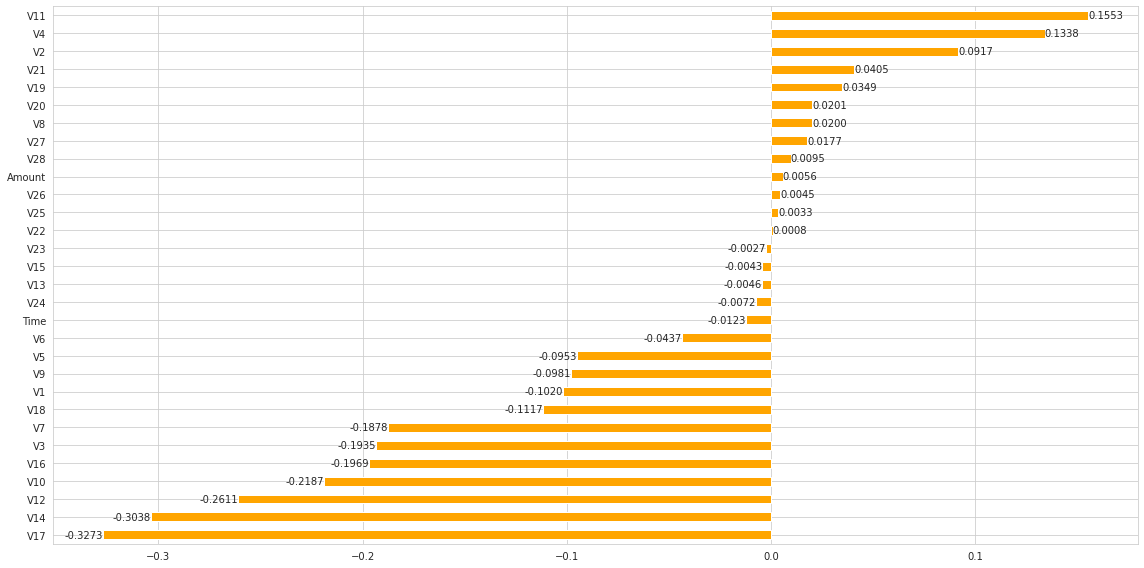

In [30]:
plt.figure(figsize=(16, 8))
ax = df2.corr()["Class"][:-1].sort_values().plot(kind="barh", color="orange")
ax.bar_label(ax.containers[0], fmt="%.4f")

plt.tight_layout()
plt.show()

In [31]:
df2.corr()["Amount"].drop("Amount").sort_values()

V2      -0.533
V5      -0.387
V1      -0.230
V3      -0.211
V23     -0.113
V8      -0.103
V10     -0.102
V22     -0.065
V19     -0.056
V25     -0.048
V9      -0.044
Time    -0.011
V12     -0.009
V16     -0.004
V26     -0.003
V15     -0.003
V11      0.000
V24      0.005
V13      0.005
Class    0.006
V17      0.008
V28      0.010
V27      0.028
V14      0.034
V18      0.036
V4       0.099
V21      0.106
V6       0.216
V20      0.341
V7       0.398
Name: Amount, dtype: float64

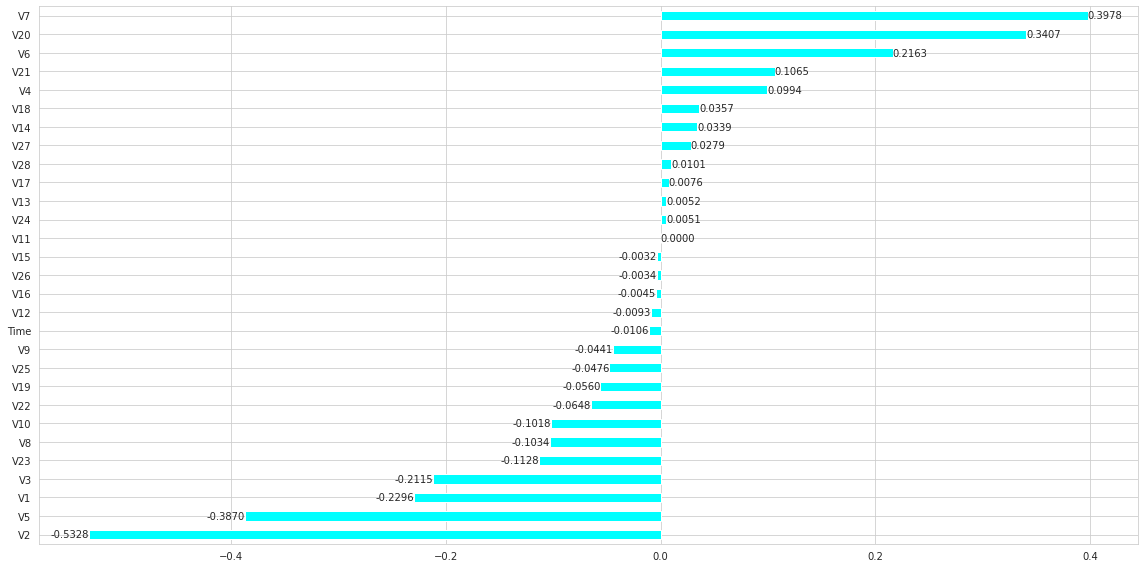

In [32]:
plt.figure(figsize=(16, 8))
ax = df2.corr()["Amount"][:-2].sort_values().plot(kind="barh", color="cyan")
ax.bar_label(ax.containers[0], fmt="%.4f")

plt.tight_layout()
plt.show()

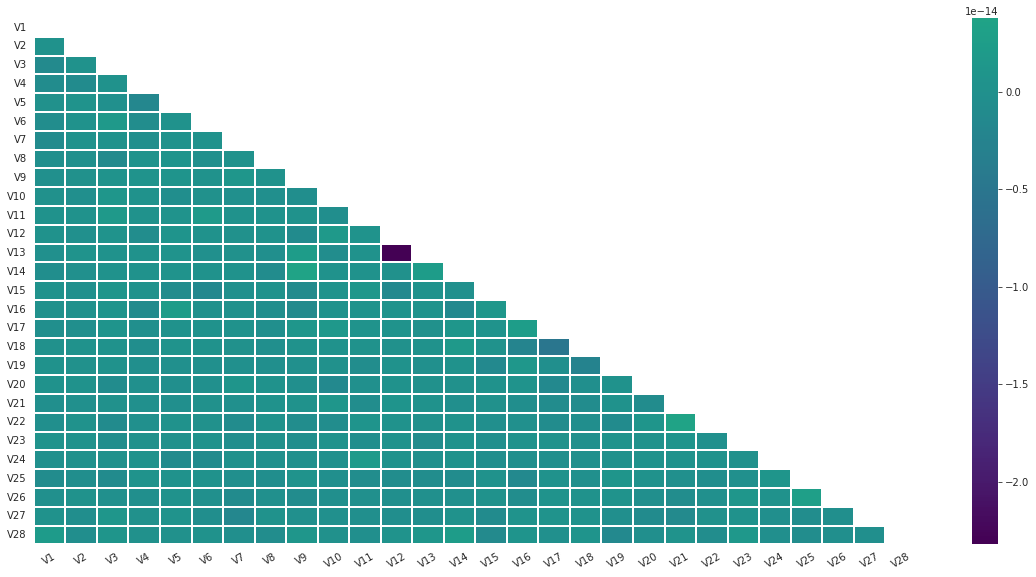

In [33]:
plt.figure(figsize=(16, 8))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_PCA.corr())

# using the upper triangle matrix as mask
sns.heatmap(
    df_PCA.corr(),
    annot=False,
    cmap="viridis",
    mask=matrix,
    #fmt='.3g',
    center=0,
    linewidths=0.1,
    linecolor='white')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [34]:
print(f"Columns: {df2.columns[[0, 29, 30]]} \n\n {df2.columns[1:29]}")

Columns: Index(['Time', 'Amount', 'Class'], dtype='object') 

 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


### Data Cleaning
Check Missing Values and Outliers

#### Missing Value Checking

In [35]:
df2.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Outlier Checking

We are just analyzing the features. Because of PCA, we can't decide they are outliers or not.

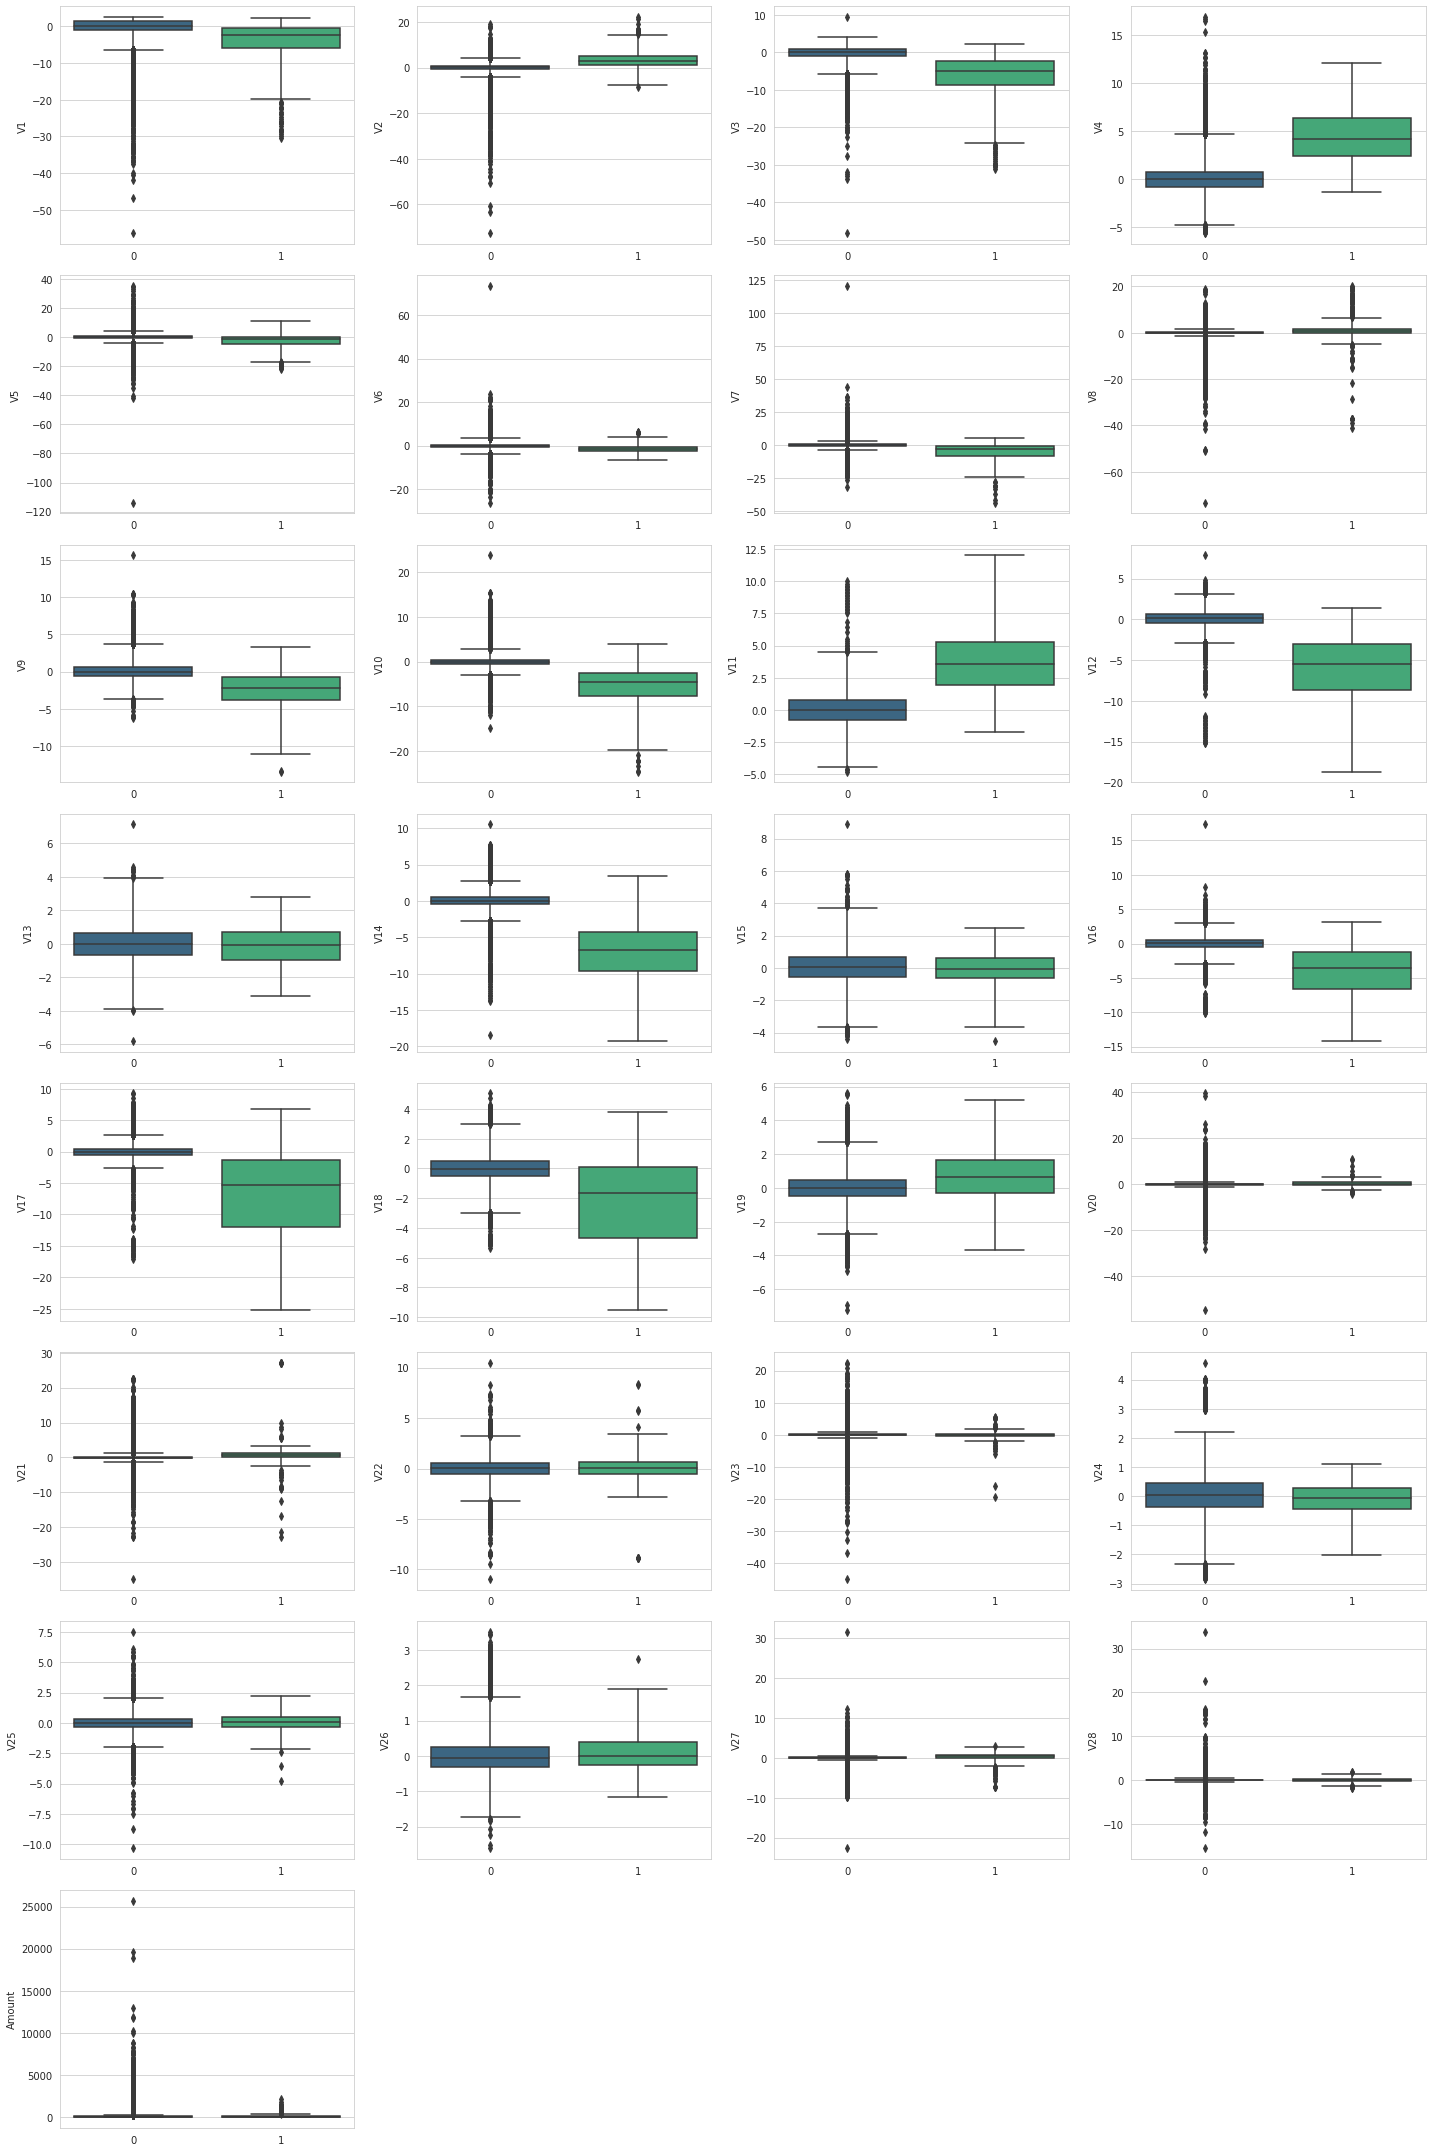

In [36]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)

# loop through the length of tickers and keep track of index
for n, col in enumerate(df2.iloc[:, 1:30].columns):
    # add a new subplot iteratively
    ax = plt.subplot(8, 4, n + 1)

    # filter df2 and plot ticker on the new subplot axis
    sns.boxplot(x="Class",
                y=col,
                data=df2,
                whis=2.5,
                palette="viridis",
                showfliers=True,
#                 showmeans=True,
#                 meanprops={
#                     "marker": "o",
#                     "markerfacecolor": "white",
#                     "markeredgecolor": "black",
#                     "markersize": "10"
#                 },
                ax=ax)

    # chart formatting
#     ax.set_title(ticker.upper())
#     ax.get_legend().remove()
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [37]:
df2.groupby("Class")["V10", "V12", "V14", "V17"].describe().T

Class              0       1
V10 count 283253.000 492.000
    mean       0.008  -5.677
    std        1.036   4.897
    min      -14.741 -24.588
    25%       -0.533  -7.757
    50%       -0.092  -4.579
    75%        0.455  -2.614
    max       23.745   4.031
V12 count 283253.000 492.000
    mean       0.009  -6.259
    std        0.945   4.654
    min      -15.145 -18.684
    25%       -0.403  -8.688
    50%        0.141  -5.503
    75%        0.618  -2.974
    max        7.848   1.376
V14 count 283253.000 492.000
    mean       0.012  -6.972
    std        0.894   4.279
    min      -18.392 -19.214
    25%       -0.423  -9.693
    50%        0.051  -6.730
    75%        0.493  -4.283
    max       10.527   3.442
V17 count 283253.000 492.000
    mean       0.011  -6.666
    std        0.749   6.971
    min      -17.098 -25.163
    25%       -0.483 -11.945
    50%       -0.065  -5.303
    75%        0.399  -1.342
    max        9.254   6.739

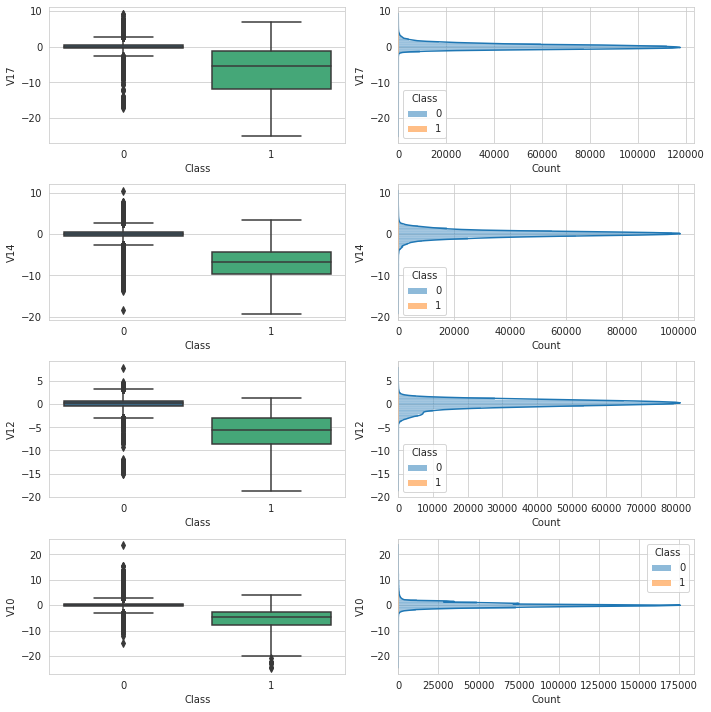

In [38]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[0, 0])
sns.histplot(data=df2, y="V17", bins=50, hue="Class", kde=True, ax=axes[0, 1])

sns.boxplot(x="Class", y="V14", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[1, 0])
sns.histplot(data=df2, y="V14", bins=50, hue="Class", kde=True, ax=axes[1, 1])


sns.boxplot(x="Class", y="V12", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[2, 0])
sns.histplot(data=df2, y="V12", bins=50, hue="Class", kde=True, ax=axes[2, 1])


sns.boxplot(x="Class", y="V10", data=df2, palette="viridis", whis=2.5, showfliers=True, ax=axes[3, 0])
sns.histplot(data=df2, y="V10", bins=50, hue="Class", kde=True, ax=axes[3, 1])

plt.tight_layout()
plt.show()

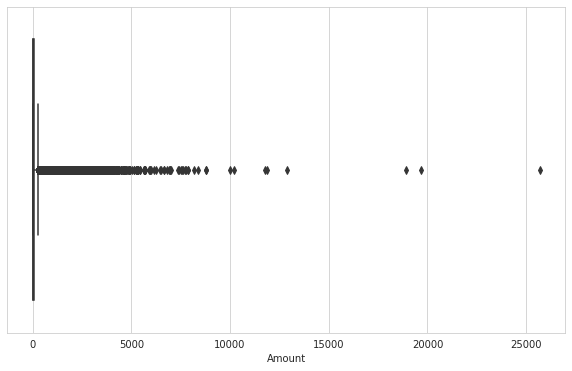

In [39]:
sns.boxplot(x="Amount", data=df2, palette="viridis", whis=2.5, showfliers=True);

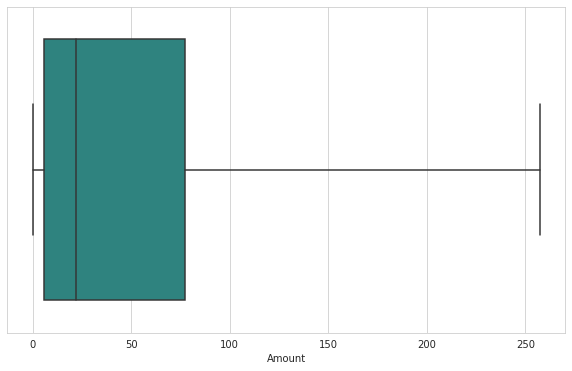

In [40]:
sns.boxplot(x="Amount", data=df2, palette="viridis", whis=2.5, showfliers=False);

---
---


## 2. Data Preprocessing

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [42]:
# PCA transformations for df
pca = PCA(n_components=2)
columns = df[["Time", "Amount"]]
pca.fit(columns)
df[["Time", "Amount"]] = pca.transform(columns)

In [43]:
# PCA transformations for df2
pca = PCA(n_components=2)
columns2 = df2[["Time", "Amount"]]
pca.fit(columns2)
df2[["Time", "Amount"]] = pca.transform(columns2)

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [44]:
X = df.drop('Class', axis=1)
y = df['Class']

In [45]:
X2 = df2.drop('Class', axis=1)
y2 = df2['Class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(f"""Data Splitted. Here are the Stats:

Rows in X_train: {X_train.shape[0]}
Rows in y_train: {y_train.shape[0]}

Rows in X_test: {X_test.shape[0]}
Rows in y_test: {y_test.shape[0]} 

Columns in X_train & X_test are 3
Columns in y_train & y_test is only 1 - the TARGET column (i.e Class)""")

Data Splitted. Here are the Stats:

Rows in X_train: 227845
Rows in y_train: 227845

Rows in X_test: 56962
Rows in y_test: 56962 

Columns in X_train & X_test are 3
Columns in y_train & y_test is only 1 - the TARGET column (i.e Class)


In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                        y2,
                                                        test_size=0.3,
                                                        random_state=42)
print(f"""Data Splitted. Here are the Stats:

Rows in X2_train: {X2_train.shape[0]}
Rows in y2_train: {y2_train.shape[0]}

Rows in X2_test: {X2_test.shape[0]}
Rows in y2_test: {y2_test.shape[0]} 

Columns in X2_train & X2_test are 3
Columns in y2_train & y2_test is only 1 - the TARGET column (i.e Class)""")

Data Splitted. Here are the Stats:

Rows in X2_train: 198621
Rows in y2_train: 198621

Rows in X2_test: 85124
Rows in y2_test: 85124 

Columns in X2_train & X2_test are 3
Columns in y2_train & y2_test is only 1 - the TARGET column (i.e Class)


## Train-Test Validation Checks
* [DeepCheck - Train Test Validation](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html)

In [48]:
train_ds = Dataset(X2_train, label=y2_train)
test_ds = Dataset(X2_test, label=y2_test)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [49]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as classification in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Validation Suite

In [50]:
# If we want to run only that check (possible with or without condition)
from deepchecks.tabular.checks import MultivariateDrift

check_with_condition = MultivariateDrift().add_condition_overall_drift_value_less_than(0.4)

# or just the check without the condition:
# check = MultivariateDrift()
dataset_drift_result = check_with_condition.run(train_ds, test_ds)

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as classification in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


In [51]:
dataset_drift_result.value

{'domain_classifier_auc': 0.49598522222222224,
 'domain_classifier_drift_score': 0,
 'domain_classifier_feature_importance': {'V12': 0.7452107279693448,
  'Amount': 0.13409961685823843,
  'V11': 0.10153256704980992,
  'V15': 0.019157088122606948,
  'V4': 0.0,
  'V5': -0.0,
  'V28': 0.0,
  'V27': 0.0,
  'V26': -0.0,
  'V25': 0.0,
  'V24': 0.0,
  'V23': 0.0,
  'V22': 0.0,
  'V21': -0.0,
  'V20': 0.0,
  'V19': -0.0,
  'V18': -0.0,
  'V17': -0.0,
  'V16': 0.0,
  'V1': 0.0,
  'V14': 0.0,
  'V13': 0.0,
  'V2': -0.0,
  'V3': 0.0,
  'V10': -0.0,
  'V9': -0.0,
  'V8': 0.0,
  'V7': 0.0,
  'V6': -0.0,
  'Time': -0.0}}

In [52]:
dataset_drift_result.passed_conditions()

True

In [53]:
from deepchecks.tabular import Suite
from deepchecks.tabular.checks import TrainTestFeatureDrift, MultivariateDrift, \
 TrainTestPredictionDrift, TrainTestLabelDrift

drift_suite = Suite(
    'drift suite',
    TrainTestFeatureDrift().add_condition_drift_score_less_than(
        max_allowed_categorical_score=0.2, max_allowed_numeric_score=0.1),
    MultivariateDrift().add_condition_overall_drift_value_less_than(0.4),
    TrainTestLabelDrift(), TrainTestPredictionDrift())

In [54]:
result = drift_suite.run(train_ds, test_ds)
result.show()

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as classification in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 drift suite

#### Scaling

In [55]:
# Scaling with the Robust Scaler
transformer = RobustScaler().fit(columns)
df[["Time", "Amount"]] = transformer.transform(columns)

In [56]:
transformer = RobustScaler().fit(columns2)
df2[["Time", "Amount"]] = transformer.transform(columns2)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

In [57]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")
    plt.title('Test Set - Confusion Matrix', y=1.1)

    print("- -- -" * 9)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train, cmap="plasma")
    plt.title('Train Set - Confusion Matrix', y=1.1)
    plt.show()

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

***ii. Model Training***

In [59]:
scaler = RobustScaler()

In [60]:
df2

Time      V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0      -0.995  -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364   
1      -0.995   1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255   
2      -0.995  -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515   
3      -0.995  -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387   
4      -0.995  -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818   
...       ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
283740  1.035 -11.881 10.072 -9.835 -2.067 -5.364 -2.607 -4.918  7.305  1.914   
283741  1.035  -0.733 -0.055  2.035 -0.739  0.868  1.058  0.024  0.295  0.585   
283742  1.035   1.920 -0.301 -3.250 -0.558  2.631  3.031 -0.297  0.708  0.432   
283743  1.035  -0.240  0.530  0.703  0.690 -0.378  0.624 -0.686  0.679  0.392   
283744  1.035  -0.533 -0.190  0.703 -0.506 -0.013 -0.650  1.577 -0.415  0.486   

          V10    V11    V12    V13    V14    V15    V16    V17    V18    V19  \
0       0.091 -0.552 -0.618 -0.991 -0.311  1.468 -0.470  0.208  0.026  0.404   
1      -0.167  1.613  1.065  0.489 -0.144  0.636  0.464 -0.115 -0.183 -0.146   
2       0.208  0.625  0.066  0.717 -0.166  2.346 -2.890  1.110 -0.121 -2.262   
3      -0.055 -0.226  0.178  0.508 -0.288 -0.631 -1.060 -0.684  1.966 -1.233   
4       0.753 -0.823  0.538  1.346 -1.120  0.175 -0.451 -0.237 -0.038  0.803   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283740  4.356 -1.593  2.712 -0.689  4.627 -0.924  1.108  1.992  0.511 -0.683   
283741 -0.976 -0.150  0.916  1.215 -0.675  1.165 -0.712 -0.026 -1.221 -1.546   
283742 -0.485  0.412  0.063 -0.184 -0.511  1.329  0.141  0.314  0.396 -0.577   
283743 -0.399 -1.934 -0.963 -1.042  0.450  1.963 -0.609  0.510  1.114  2.898   
283744 -0.915 -1.040 -0.032 -0.188 -0.084  0.041 -0.303 -0.660  0.167 -0.256   

          V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
0       0.251 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021   1.774   
1      -0.069 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015  -0.268   
2       0.525  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060   4.959   
3      -0.208 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061   1.411   
4       0.409 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   0.667   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
283740  1.476  0.213  0.112  1.014 -0.509  1.437  0.250  0.944  0.824  -0.295   
283741  0.060  0.214  0.924  0.012 -1.016 -0.607 -0.395  0.068 -0.054   0.039   
283742  0.001  0.232  0.578 -0.038  0.640  0.266 -0.087  0.004 -0.027   0.638   
283743  0.127  0.265  0.800 -0.163  0.123 -0.569  0.547  0.109  0.105  -0.167   
283744  0.383  0.261  0.643  0.377  0.009 -0.474 -0.818 -0.002  0.014   2.711   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
283740      0  
283741      0  
283742      0  
283743      0  
283744      0  

[283745 rows x 31 columns]

In [61]:
df2[df2["Class"] == 1].Class.count()

492

In [62]:
df2[df2["Class"] == 0].Class.count()

283253

#### [Class Weight Calculation for Unbalanced Data](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

In [63]:
"""# Class Weight Calculation for Unbalanced Data
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0, 0.99, 200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator=lr,
                          param_grid=param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X2_train, y2_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
weigh_data = pd.DataFrame({
    'score': gridsearch.cv_results_['mean_test_score'],
    'weight': (1 - weights)
})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i / 10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights', fontsize=24)
plt.show()"""

"# Class Weight Calculation for Unbalanced Data\nfrom sklearn.model_selection import GridSearchCV, StratifiedKFold\n\nlr = LogisticRegression(solver='newton-cg')\n\n#Setting the range for class weights\nweights = np.linspace(0.0, 0.99, 200)\n\n#Creating a dictionary grid for grid search\nparam_grid = {'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}\n\n#Fitting grid search to the train data with 5 folds\ngridsearch = GridSearchCV(estimator=lr,\n                          param_grid=param_grid,\n                          cv=StratifiedKFold(),\n                          n_jobs=-1,\n                          scoring='f1',\n                          verbose=2).fit(X2_train, y2_train)\n\n#Ploting the score for different values of weight\nsns.set_style('whitegrid')\nplt.figure(figsize=(12, 8))\nweigh_data = pd.DataFrame({\n    'score': gridsearch.cv_results_['mean_test_score'],\n    'weight': (1 - weights)\n})\nsns.lineplot(weigh_data['weight'], weigh_data['score'])\nplt.xlabel('Weight 

In [64]:
print('Class Ratio:', sum(df2['Class']) / len(df2['Class']))

Class Ratio: 0.001733951259053023


In [65]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

In [66]:
target = df2.loc[:, 'Class']

In [67]:
fold_no = 1
for train_index, test_index in skf.split(df2, target):
    train = df2.loc[train_index, :]
    test = df2.loc[test_index, :]
    print('Fold', str(fold_no), 'Class Ratio:',
          sum(test['Class']) / len(test['Class']))
    fold_no += 1

Fold 1 Class Ratio: 0.001726902676699149
Fold 2 Class Ratio: 0.001726902676699149
Fold 3 Class Ratio: 0.001726902676699149
Fold 4 Class Ratio: 0.001744524132583834
Fold 5 Class Ratio: 0.001744524132583834


#### [Class Weight Calculation for Unbalanced Data - 2](https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b)

In [68]:
# # define weight hyperparameter
# w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
#      {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
#      {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
#      {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
#      {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
#      {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
#      {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
#      {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
#      {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
#      {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
# hyperparam_grid = {"class_weight": w }

In [69]:
# # define model
# lg3 = LogisticRegression(random_state=13)
# # define evaluation procedure
# grid = GridSearchCV(lg3,
#                     hyperparam_grid,
#                     scoring="roc_auc",
#                     cv=100,
#                     n_jobs=-1,
#                     refit=True)
# grid.fit(X2, y2)
# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

# Out: Best score: 0.9816513844599863 with param: {'class_weight': {0: 1.0, 1: 1000}}

In [70]:
operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

pipe_log_model = Pipeline(steps=operations)

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.37      0.79      0.50       135

    accuracy                           1.00     85124
   macro avg       0.68      0.90      0.75     85124
weighted avg       1.00      1.00      1.00     85124

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198264
           1       0.44      0.89      0.59       357

    accuracy                           1.00    198621
   macro avg       0.72      0.94      0.79    198621
weighted avg       1.00      1.00      1.00    198621



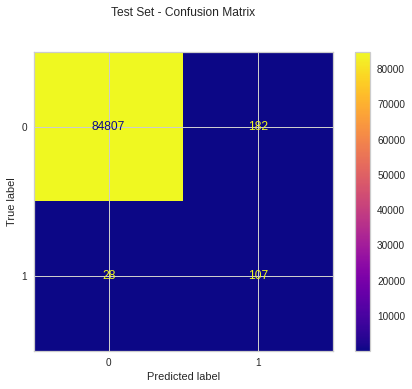

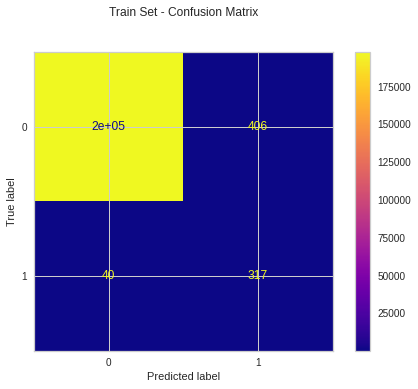

In [71]:
pipe_log_model.fit(X2_train, y2_train)
eval_metric(pipe_log_model, X2_train, y2_train, X2_test, y2_test)

In [72]:
from sklearn.metrics import make_scorer

scoring = {
    "precision_Fraud": make_scorer(precision_score, labels=[1]),
    "recall_Fraud": make_scorer(recall_score, labels=[1]),
    "f1_Fraud": make_scorer(f1_score, labels=[1]),
    "accuracy_Fraud": make_scorer(accuracy_score)
}

In [73]:
operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X2_train,
                        y2_train,
                        return_train_score=True,
                        scoring=scoring,
                        error_score="raise",
                        cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Fraud    0.433
train_precision_Fraud   0.447
test_recall_Fraud       0.885
train_recall_Fraud      0.890
test_f1_Fraud           0.581
train_f1_Fraud          0.594
test_accuracy_Fraud     0.998
train_accuracy_Fraud    0.998
dtype: float64

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

LOGISTIC REGRESSION MODEL
* ** ** ** ** ** ** *
TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.37      0.79      0.50       135

    accuracy                           1.00     85124
   macro avg       0.68      0.90      0.75     85124
weighted avg       1.00      1.00      1.00     85124

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198264
           1       0.44      0.89      0.59       357

    accuracy                           1.00    198621
   macro avg       0.72      0.94      0.79    198621
weighted avg       1.00      1.00      1.00    198621



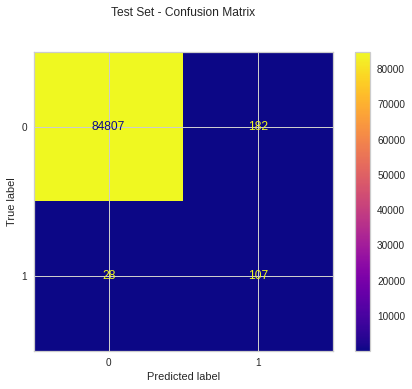

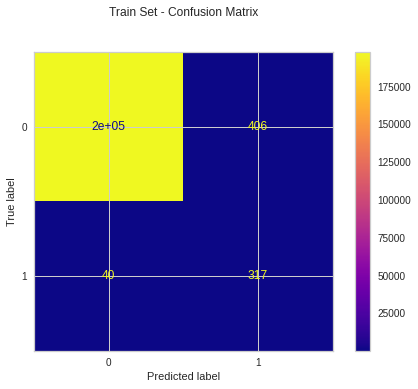

In [74]:
print("LOGISTIC REGRESSION MODEL")
print("* *" * 7)
eval_metric(pipe_log_model, X2_train, y2_train, X2_test, y2_test)


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


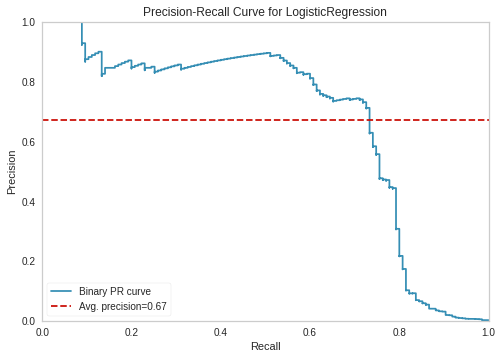

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [75]:
from yellowbrick.classifier import PrecisionRecallCurve  # For Un-Balanced Data

model = pipe_log_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show()

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* [DeepChecks Model Evaluation Checks](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html)

In [76]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['quality'], test_size=0.2, random_state=42)

operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X2_train, y2_train)

Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('log',
                 LogisticRegression(C=0.002, class_weight={0: 1.0, 1: 100},
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [77]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X2_train, label=y2_train, cat_features=[])
test_ds = Dataset(X2_test, label=y2_test, cat_features=[])

In [78]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_log_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 15 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 15 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

In [79]:
from deepchecks.tabular.checks import TrainTestPerformance

operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X2_train, y2_train)
# Initialize the check and add an optional condition
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, pipe_log_model)
result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Performance

In [80]:
evaluation_suite

Model Evaluation Suite: [
	0: TrainTestPerformance
		Conditions:
			0: Train-Test scores relative degradation is less than 0.1
	1: RocReport(excluded_classes=[])
		Conditions:
			0: AUC score for all the classes is greater than 0.7
	2: ConfusionMatrixReport
	3: TrainTestPredictionDrift(drift_mode=auto)
		Conditions:
			0: categorical drift score < 0.15 and numerical drift score < 0.075
	4: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is greater than 10%
	5: WeakSegmentsPerformance(n_to_show=5)
		Conditions:
			0: The relative performance of weakest segment is greater than 80% of average model performance.
	6: CalibrationScore
	7: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value higher than -0.1
			1: Systematic error ratio lower than 0.01
	8: UnusedFeatures
		Conditions:
			0: Number of high variance unused features is less or equal to 5
	9: BoostingOverfit
		Conditions:
			0: Test score over iterations is less than 5% from the best s

In [81]:
evaluation_suite[0].clean_conditions()
evaluation_suite[0].add_condition_train_test_relative_degradation_less_than(0.3)
evaluation_suite = evaluation_suite.remove(7)

In [82]:
result = evaluation_suite.run(train_ds, test_ds, pipe_log_model)
result.passed(fail_if_warning=False)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 16 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 16 seconds


False

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

In [83]:
X3 = df2.drop('Class', axis=1)
y3 = df2['Class']

In [84]:
# Using SMOTE to balance the data
import plotly.express as px

smote = SMOTE(random_state=42)
X3, y3 = smote.fit_resample(X3, y3)

# Plot the results
fig = px.pie(values=y3.value_counts(),
             width=800,
             height=400,
             title="Data Balance",
             color_discrete_sequence=["skyblue", "black"])
fig.show()

In [85]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,
                                                        y3,
                                                        test_size=0.10,
                                                        random_state=42)
print(f"""Data Splitted. Here are the Stats:

Rows in X3_train: {X3_train.shape[0]}
Rows in y3_train: {y3_train.shape[0]}

Rows in X3_test: {X3_test.shape[0]}
Rows in y3_test: {y3_test.shape[0]} 

Columns in X3_train & X3_test are 3
Columns in y3_train & y3_test is only 1 - the TARGET column (i.e Class)""")

Data Splitted. Here are the Stats:

Rows in X3_train: 509855
Rows in y3_train: 509855

Rows in X3_test: 56651
Rows in y3_test: 56651 

Columns in X3_train & X3_test are 3
Columns in y3_train & y3_test is only 1 - the TARGET column (i.e Class)


***ii. Model Training***

In [86]:
operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

pipe_log_model = Pipeline(steps=operations)

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     28267
           1       0.68      1.00      0.81     28384

    accuracy                           0.76     56651
   macro avg       0.84      0.76      0.75     56651
weighted avg       0.84      0.76      0.75     56651

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.53      0.69    254986
           1       0.68      1.00      0.81    254869

    accuracy                           0.76    509855
   macro avg       0.84      0.76      0.75    509855
weighted avg       0.84      0.76      0.75    509855



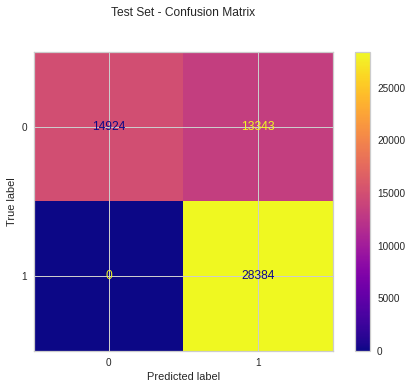

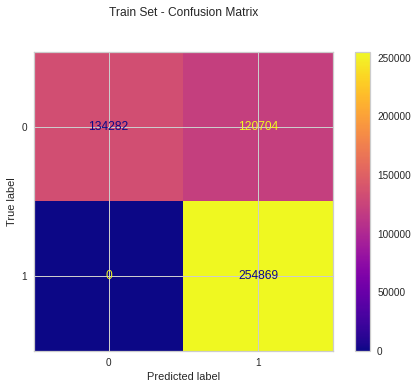

In [87]:
pipe_log_model.fit(X3_train, y3_train)
eval_metric(pipe_log_model, X3_train, y3_train, X3_test, y3_test)

In [88]:
scoring = {
    "precision_Fraud": make_scorer(precision_score, labels=[1]),
    "recall_Fraud": make_scorer(recall_score, labels=[1]),
    "f1_Fraud": make_scorer(f1_score, labels=[1]),
    "accuracy_Fraud": make_scorer(accuracy_score)
}

In [89]:
operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X3_train,
                        y3_train,
                        return_train_score=True,
                        scoring=scoring,
                        error_score="raise",
                        cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Fraud    0.676
train_precision_Fraud   0.676
test_recall_Fraud       1.000
train_recall_Fraud      1.000
test_f1_Fraud           0.807
train_f1_Fraud          0.807
test_accuracy_Fraud     0.760
train_accuracy_Fraud    0.760
dtype: float64

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

LOGISTIC REGRESSION MODEL WITH SMOTE
* ** ** ** ** ** ** *
TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     28267
           1       0.68      1.00      0.81     28384

    accuracy                           0.76     56651
   macro avg       0.84      0.76      0.75     56651
weighted avg       0.84      0.76      0.75     56651

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.53      0.69    254986
           1       0.68      1.00      0.81    254869

    accuracy                           0.76    509855
   macro avg       0.84      0.76      0.75    509855
weighted avg       0.84      0.76      0.75    509855



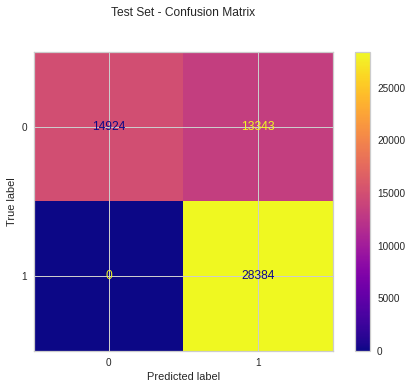

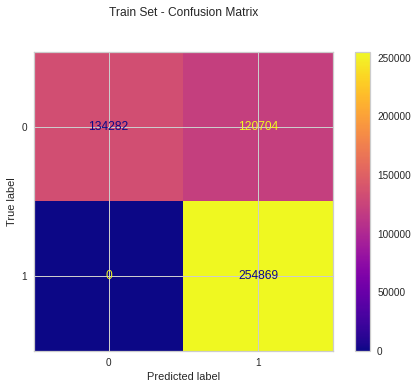

In [90]:
print("LOGISTIC REGRESSION MODEL WITH SMOTE")
print("* *" * 7)
eval_metric(pipe_log_model, X3_train, y3_train, X3_test, y3_test)

***iv.  Plot Precision and Recall Curve***


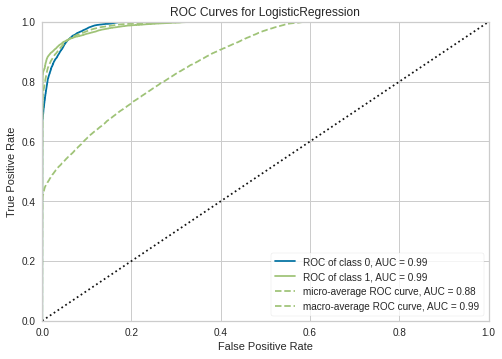

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [91]:
from yellowbrick.classifier import ROCAUC  # For Balanced Data / For Binary Data

model = pipe_log_model
visualizer = ROCAUC(model)

visualizer.fit(X3_train, y3_train)
visualizer.score(X3_test, y3_test)
visualizer.show()

***v. Apply Model Evaluation Checks***
* [DeepCheck -  Model Evaluation Checks](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html)

In [92]:
smote = SMOTE(random_state=42)
smote.fit_resample(X3, y3)

(         Time      V1     V2      V3     V4     V5     V6      V7      V8  \
 0      -0.995  -1.360 -0.073   2.536  1.378 -0.338  0.462   0.240   0.099   
 1      -0.995   1.192  0.266   0.166  0.448  0.060 -0.082  -0.079   0.085   
 2      -0.995  -1.358 -1.340   1.773  0.380 -0.503  1.800   0.791   0.248   
 3      -0.995  -0.966 -0.185   1.793 -0.863 -0.010  1.247   0.238   0.377   
 4      -0.995  -1.158  0.878   1.549  0.403 -0.407  0.096   0.593  -0.271   
 ...       ...     ...    ...     ...    ...    ...    ...     ...     ...   
 566501 -0.194 -13.193 12.786  -9.907  3.320 -4.801  5.760 -18.751 -37.353   
 566502 -0.748   1.140  1.116  -0.135  3.147  0.407 -0.697   0.185  -0.131   
 566503 -0.286   0.326  1.847  -2.479  3.826 -0.659 -0.931  -2.149   0.609   
 566504  0.087   1.470  0.740   0.164  3.551  0.281 -0.098   0.034  -0.123   
 566505 -0.399  -8.669  6.932 -11.989  4.208 -6.997 -3.270  -7.701   6.140   
 
            V9    V10    V11    V12    V13    V14    V15    V1

In [93]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X3_train, label=y3_train, cat_features=[])
test_ds = Dataset(X3_test, label=y3_test, cat_features=[])

In [94]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_log_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 15 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 15 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

In [95]:
from deepchecks.tabular.checks import TrainTestPerformance

operations = [("RobustScaler", scaler),
              ("log",
               LogisticRegression(class_weight={
                   0: 1.0,
                   1: 100
               },
                                  random_state=101,
                                  penalty='l1',
                                  C=0.002,
                                  solver='saga'))]

pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X3_train, y3_train)
# Initialize the check and add an optional condition
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, pipe_log_model)
result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Performance

In [96]:
evaluation_suite

Model Evaluation Suite: [
	0: TrainTestPerformance
		Conditions:
			0: Train-Test scores relative degradation is less than 0.1
	1: RocReport(excluded_classes=[])
		Conditions:
			0: AUC score for all the classes is greater than 0.7
	2: ConfusionMatrixReport
	3: TrainTestPredictionDrift(drift_mode=auto)
		Conditions:
			0: categorical drift score < 0.15 and numerical drift score < 0.075
	4: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is greater than 10%
	5: WeakSegmentsPerformance(n_to_show=5)
		Conditions:
			0: The relative performance of weakest segment is greater than 80% of average model performance.
	6: CalibrationScore
	7: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value higher than -0.1
			1: Systematic error ratio lower than 0.01
	8: UnusedFeatures
		Conditions:
			0: Number of high variance unused features is less or equal to 5
	9: BoostingOverfit
		Conditions:
			0: Test score over iterations is less than 5% from the best s

In [97]:
evaluation_suite[0].clean_conditions()
evaluation_suite[0].add_condition_train_test_relative_degradation_less_than(0.3)
evaluation_suite = evaluation_suite.remove(7)

In [98]:
result = evaluation_suite.run(train_ds, test_ds, pipe_log_model)
result.passed(fail_if_warning=False)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 16 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 16 seconds


False

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [99]:
rf_model = RandomForestClassifier(max_features=12,
                                  max_depth=6,
                                  random_state=101)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(max_depth=6, max_features=12, random_state=101)

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

RANDOM FOREST MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28267
           1       0.99      0.94      0.97     28384

    accuracy                           0.97     56651
   macro avg       0.97      0.97      0.97     56651
weighted avg       0.97      0.97      0.97     56651

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    254986
           1       0.99      0.94      0.97    254869

    accuracy                           0.97    509855
   macro avg       0.97      0.97      0.97    509855
weighted avg       0.97      0.97      0.97    509855



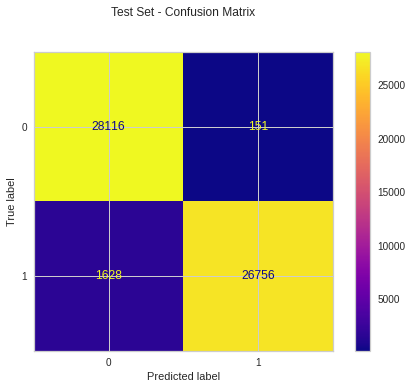

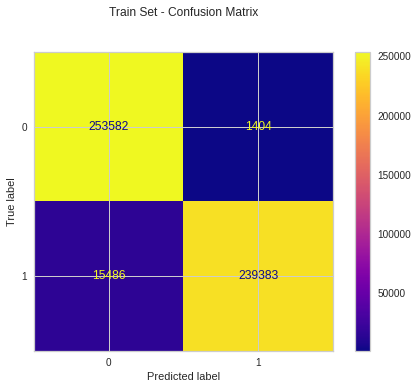

In [100]:
print("RANDOM FOREST MODEL")
print("***" * 7)
eval_metric(rf_model, X3_train, y3_train, X3_test, y3_test)

***iii. Plot Precision and Recall Curve***


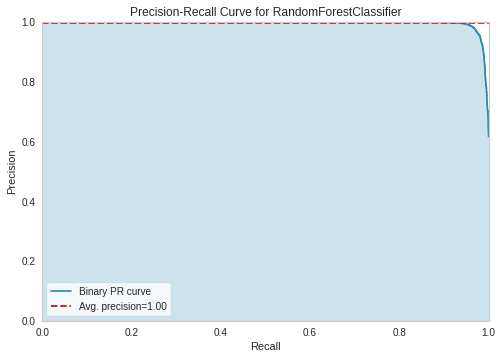

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [101]:
viz = PrecisionRecallCurve(rf_model)
viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show()

***v. Apply Model Evaluation Checks***
* [DeepCheks - Model Evaluation Checks](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html)

In [102]:
rf_model = RandomForestClassifier(max_features=12,
                                  max_depth=6,
                                  random_state=101)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(max_depth=6, max_features=12, random_state=101)

In [103]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X3_train, label=y3_train, cat_features=[])
test_ds = Dataset(X3_test, label=y3_test, cat_features=[])

In [104]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

In [105]:
from deepchecks.tabular.checks import TrainTestPerformance

rf_model = RandomForestClassifier(max_features=12,
                                  max_depth=6,
                                  random_state=101)
rf_model.fit(X3_train, y3_train)
# Initialize the check and add an optional condition
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, rf_model)
result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Performance

In [106]:
evaluation_suite

Model Evaluation Suite: [
	0: TrainTestPerformance
		Conditions:
			0: Train-Test scores relative degradation is less than 0.1
	1: RocReport(excluded_classes=[])
		Conditions:
			0: AUC score for all the classes is greater than 0.7
	2: ConfusionMatrixReport
	3: TrainTestPredictionDrift(drift_mode=auto)
		Conditions:
			0: categorical drift score < 0.15 and numerical drift score < 0.075
	4: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is greater than 10%
	5: WeakSegmentsPerformance(n_to_show=5)
		Conditions:
			0: The relative performance of weakest segment is greater than 80% of average model performance.
	6: CalibrationScore
	7: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value higher than -0.1
			1: Systematic error ratio lower than 0.01
	8: UnusedFeatures
		Conditions:
			0: Number of high variance unused features is less or equal to 5
	9: BoostingOverfit
		Conditions:
			0: Test score over iterations is less than 5% from the best s

In [107]:
evaluation_suite[0].clean_conditions()
evaluation_suite[0].add_condition_train_test_relative_degradation_less_than(0.3)
evaluation_suite = evaluation_suite.remove(7)

In [108]:
result = evaluation_suite.run(train_ds, test_ds, rf_model)
result.passed(fail_if_warning=False)

True

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [109]:
from xgboost import XGBClassifier

In [110]:
from sklearn.metrics import make_scorer

scoring = {
    "precision_Fraud": make_scorer(precision_score, labels=[1]),
    "recall_Fraud": make_scorer(recall_score, labels=[1]),
    "f1_Fraud": make_scorer(f1_score, labels=[1]),
    "accuracy_Fraud": make_scorer(accuracy_score)
}

In [111]:
recall_Fraud = make_scorer(recall_score, labels=[1])

In [112]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

#### Vanilla Model

In [113]:
xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X3_train, y3_train)

XGBClassifier(random_state=101)

**Cross Validation**

In [114]:
model_xgb= XGBClassifier(random_state=101)

scores = cross_validate(model_xgb, X3_train, y3_train, scoring=scoring, 
                        cv=skf, return_train_score=True)

df_scores_xgb_cv = pd.DataFrame(scores, index=range(1, 6))
df_scores_xgb_cv

fit_time  score_time  test_precision_Fraud  train_precision_Fraud  \
1    95.014       0.423                 0.988                  0.989   
2    96.620       0.419                 0.988                  0.988   
3    97.109       0.429                 0.989                  0.989   
4    97.130       0.432                 0.989                  0.989   
5    96.984       0.431                 0.989                  0.989   

   test_recall_Fraud  train_recall_Fraud  test_f1_Fraud  train_f1_Fraud  \
1              0.965               0.965          0.976           0.977   
2              0.967               0.968          0.978           0.978   
3              0.967               0.968          0.978           0.978   
4              0.964               0.966          0.977           0.977   
5              0.966               0.967          0.977           0.978   

   test_accuracy_Fraud  train_accuracy_Fraud  
1                0.977                 0.977  
2                0.978                 0.978  
3                0.978                 0.978  
4                0.977                 0.977  
5                0.978                 0.978

In [115]:
df_scores_xgb_cv.mean()[2:]

test_precision_Fraud    0.989
train_precision_Fraud   0.989
test_recall_Fraud       0.966
train_recall_Fraud      0.967
test_f1_Fraud           0.977
train_f1_Fraud          0.978
test_accuracy_Fraud     0.977
train_accuracy_Fraud    0.978
dtype: float64

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [116]:
#Calculated Max Accuracy by applying StratifiedKFold
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=101, shuffle = True)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.95% (0.01%)


XGBOOST VANILLA MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28267
           1       0.99      0.97      0.98     28384

    accuracy                           0.98     56651
   macro avg       0.98      0.98      0.98     56651
weighted avg       0.98      0.98      0.98     56651

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    254986
           1       0.99      0.97      0.98    254869

    accuracy                           0.98    509855
   macro avg       0.98      0.98      0.98    509855
weighted avg       0.98      0.98      0.98    509855



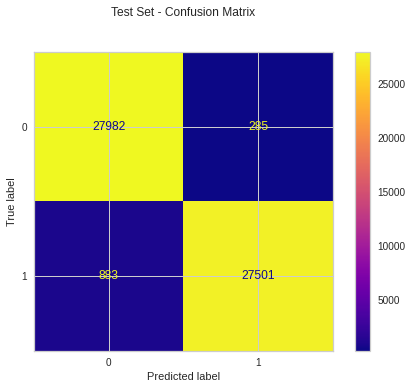

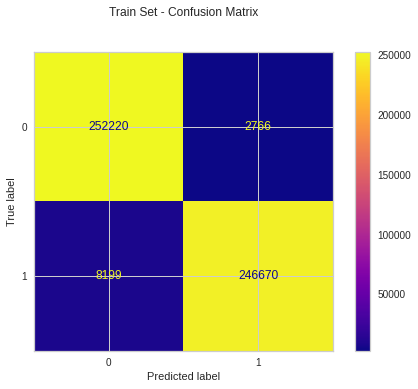

In [117]:
print("XGBOOST VANILLA MODEL")
print("***" * 7)
eval_metric(xgb_model, X3_train, y3_train, X3_test, y3_test)

***iii. Plot Precision and Recall Curve***


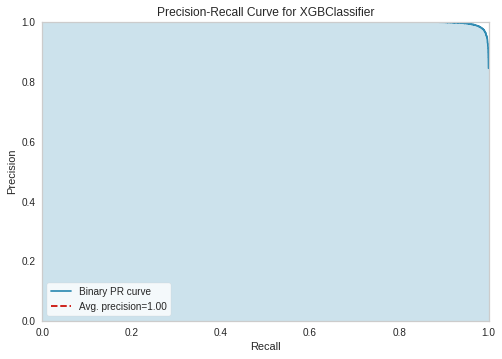

In [118]:
viz = PrecisionRecallCurve(xgb_model)
viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

#### Grid Search-1

In [119]:
# I had nice score with vanilla model so that i will tune my model around default values
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 101,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [120]:
model_xgb_gs =  XGBClassifier(random_state=101)

param_grid = {'xgb_model__learning_rate': [0.1, 0.15, 0.20],
              'xgb_model__max_depth' : [4, 5, 6],                        
              'xgb_model__n_estimators' : [80, 100, 120, 150],
              'xgb_model__subsample': [0.8, 1]
              }

xgb_grid_model = GridSearchCV(model_xgb_gs, param_grid = param_grid, 
                              scoring = recall_Fraud, cv=5, n_jobs=-1, 
                              return_train_score=True)

In [121]:
#xgb_grid_model.fit(X3_train, y3_train)

In [122]:
# xgb_grid_model.best_params_

**Best parameters of first grid search**

{'xgb_model__learning_rate': 0.1,

'xgb_model__max_depth': 4,

'xgb_model__n_estimators': 80,

'xgb_model__subsample': 0.8}


**Model With Best Parameters**

For not running grid searches, i assigned the best parameters to a model

In [123]:
xgb_grid1_model = XGBClassifier(xgb_model__learning_rate = 0.1,
                          xgb_model__max_depth = 4,
                          xgb_model__n_estimators = 80,
                          xgb_model__subsample = 0.8, 
                          random_state=101)
xgb_grid1_model.fit(X3_train, y3_train)

XGBClassifier(random_state=101, xgb_model__learning_rate=0.1,
              xgb_model__max_depth=4, xgb_model__n_estimators=80,
              xgb_model__subsample=0.8)

***ii. Prediction and Model Evaluating***

XGBOOST GRID1 MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28267
           1       0.99      0.97      0.98     28384

    accuracy                           0.98     56651
   macro avg       0.98      0.98      0.98     56651
weighted avg       0.98      0.98      0.98     56651

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    254986
           1       0.99      0.97      0.98    254869

    accuracy                           0.98    509855
   macro avg       0.98      0.98      0.98    509855
weighted avg       0.98      0.98      0.98    509855



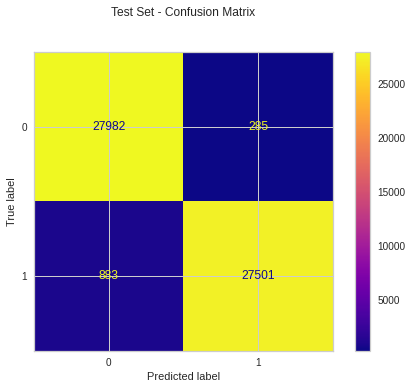

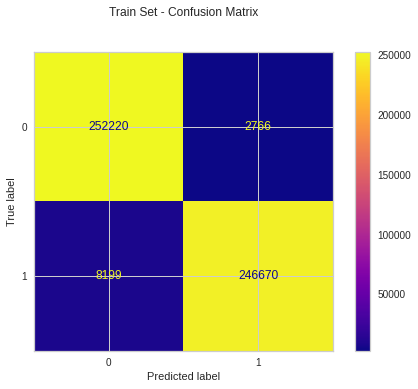

In [124]:
print("XGBOOST GRID1 MODEL")
print("***" * 7)
eval_metric(xgb_grid1_model, X3_train, y3_train, X3_test, y3_test)

**iii. Plot Precision and Recall Curve**

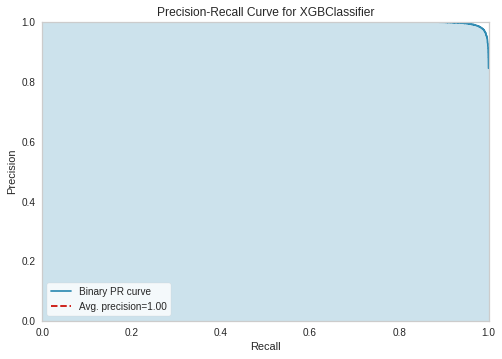

In [125]:
viz = PrecisionRecallCurve(xgb_grid1_model)
viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

#### Grid Search-2

In [126]:
model_xgb_gs2 =  XGBClassifier(random_state=101)

param_grid2 = {'xgb_model__learning_rate': [0.025, 0.05, 0.075, 0.1],
              'xgb_model__max_depth' : [4, 5],                        
              'xgb_model__n_estimators' : [50, 65, 80],
              'xgb_model__subsample': [0.8]
              }

xgb_grid_model2 = GridSearchCV(model_xgb_gs2, param_grid = param_grid2, 
                              scoring= recall_Fraud, cv=5, n_jobs=-1, 
                              return_train_score=True)

In [127]:
#xgb_grid_model2.fit(X3_train, y3_train)

In [128]:
#xgb_grid_model2.best_params_

**Best Parameters of Second Grid Search**

{'xgb_model__learning_rate': 0.025,

 'xgb_model__max_depth': 4,

 'xgb_model__n_estimators': 50,
 
 'xgb_model__subsample': 0.8}


**Model With Best Parameters**

In [129]:
xgb_grid2_model = XGBClassifier(xgb_model__learning_rate = 0.1,
                          xgb_model__max_depth = 4,
                          xgb_model__n_estimators = 80,
                          xgb_model__subsample = 0.8, 
                          random_state=101)
xgb_grid2_model.fit(X3_train, y3_train)

XGBClassifier(random_state=101, xgb_model__learning_rate=0.1,
              xgb_model__max_depth=4, xgb_model__n_estimators=80,
              xgb_model__subsample=0.8)

***ii. Prediction and Model Evaluating***

XGBOOST GRID2 MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28267
           1       0.99      0.97      0.98     28384

    accuracy                           0.98     56651
   macro avg       0.98      0.98      0.98     56651
weighted avg       0.98      0.98      0.98     56651

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    254986
           1       0.99      0.97      0.98    254869

    accuracy                           0.98    509855
   macro avg       0.98      0.98      0.98    509855
weighted avg       0.98      0.98      0.98    509855



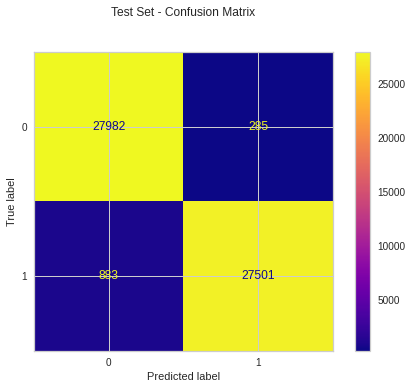

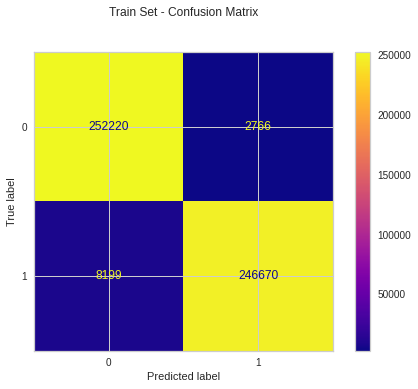

In [130]:
print("XGBOOST GRID2 MODEL")
print("***" * 7)
eval_metric(xgb_grid2_model, X3_train, y3_train, X3_test, y3_test)

**iii. Plot Precision and Recall Curve**

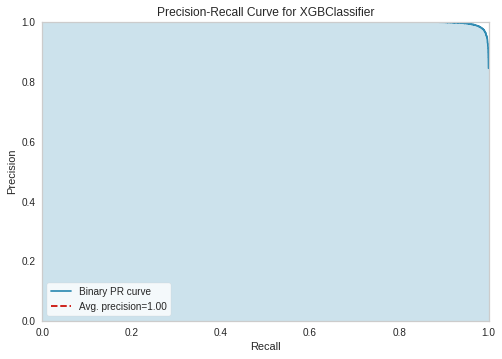

In [131]:
viz = PrecisionRecallCurve(xgb_grid2_model)
viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

#### XGBoost Final Model

In [132]:
xgb_final_model = XGBClassifier(xgb_model__learning_rate = 0.025,
                          xgb_model__max_depth = 4,
                          xgb_model__n_estimators = 50,
                          xgb_model__subsample = 0.8, 
                          random_state=101)
xgb_final_model.fit(X3_train, y3_train)

XGBClassifier(random_state=101, xgb_model__learning_rate=0.025,
              xgb_model__max_depth=4, xgb_model__n_estimators=50,
              xgb_model__subsample=0.8)

**Cross validation**

In [133]:
model_xgb_final = XGBClassifier(xgb_model__learning_rate = 0.025,
                          xgb_model__max_depth = 4,
                          xgb_model__n_estimators = 50,
                          xgb_model__subsample = 0.8, 
                          random_state=101)

scores = cross_validate(model_xgb_final, X3_train, y3_train, scoring=scoring, 
                        cv=skf, return_train_score=True)

df_scores_xgb_cv2 = pd.DataFrame(scores, index=range(1, 6))
df_scores_xgb_cv2

fit_time  score_time  test_precision_Fraud  train_precision_Fraud  \
1    92.389       0.409                 0.988                  0.989   
2    92.675       0.403                 0.988                  0.988   
3    92.095       0.419                 0.989                  0.989   
4    91.623       0.404                 0.989                  0.989   
5    91.596       0.409                 0.989                  0.989   

   test_recall_Fraud  train_recall_Fraud  test_f1_Fraud  train_f1_Fraud  \
1              0.965               0.965          0.976           0.977   
2              0.967               0.968          0.978           0.978   
3              0.967               0.968          0.978           0.978   
4              0.964               0.966          0.977           0.977   
5              0.966               0.967          0.977           0.978   

   test_accuracy_Fraud  train_accuracy_Fraud  
1                0.977                 0.977  
2                0.978                 0.978  
3                0.978                 0.978  
4                0.977                 0.977  
5                0.978                 0.978

In [134]:
df_scores_xgb_cv2.mean()[2:]

test_precision_Fraud    0.989
train_precision_Fraud   0.989
test_recall_Fraud       0.966
train_recall_Fraud      0.967
test_f1_Fraud           0.977
train_f1_Fraud          0.978
test_accuracy_Fraud     0.977
train_accuracy_Fraud    0.978
dtype: float64

***v. Apply Model Evaluation Checks***
* [DeepCheks - Model Evaluation Checks](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html)

In [135]:
gbr = XGBClassifier(xgb_model__learning_rate = 0.025,
                          xgb_model__max_depth = 4,
                          xgb_model__n_estimators = 50,
                          xgb_model__subsample = 0.8, 
                          random_state=101)
gbr.fit(X3_train, y3_train)

XGBClassifier(random_state=101, xgb_model__learning_rate=0.025,
              xgb_model__max_depth=4, xgb_model__n_estimators=50,
              xgb_model__subsample=0.8)

In [136]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X3_train, label=y3_train, cat_features=[])
test_ds = Dataset(X3_test, label=y3_test, cat_features=[])

In [137]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

In [138]:
from deepchecks.tabular.checks import TrainTestPerformance

gbr = XGBClassifier(xgb_model__learning_rate = 0.025,
                          xgb_model__max_depth = 4,
                          xgb_model__n_estimators = 50,
                          xgb_model__subsample = 0.8, 
                          random_state=101)
gbr.fit(X3_train, y3_train)
# Initialize the check and add an optional condition
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, gbr)
result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Performance

In [139]:
evaluation_suite

Model Evaluation Suite: [
	0: TrainTestPerformance
		Conditions:
			0: Train-Test scores relative degradation is less than 0.1
	1: RocReport(excluded_classes=[])
		Conditions:
			0: AUC score for all the classes is greater than 0.7
	2: ConfusionMatrixReport
	3: TrainTestPredictionDrift(drift_mode=auto)
		Conditions:
			0: categorical drift score < 0.15 and numerical drift score < 0.075
	4: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is greater than 10%
	5: WeakSegmentsPerformance(n_to_show=5)
		Conditions:
			0: The relative performance of weakest segment is greater than 80% of average model performance.
	6: CalibrationScore
	7: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value higher than -0.1
			1: Systematic error ratio lower than 0.01
	8: UnusedFeatures
		Conditions:
			0: Number of high variance unused features is less or equal to 5
	9: BoostingOverfit
		Conditions:
			0: Test score over iterations is less than 5% from the best s

In [140]:
evaluation_suite[0].clean_conditions()
evaluation_suite[0].add_condition_train_test_relative_degradation_less_than(0.3)
evaluation_suite = evaluation_suite.remove(7)

In [141]:
result = evaluation_suite.run(train_ds, test_ds, gbr)
result.passed(fail_if_warning=False)

True

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

#### Without Smote

##### Balanced With Class Weights

***ii. Define Model***

In [143]:
model = Sequential()
model.add(Dense(48, activation = "relu", input_dim = X2_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(24, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

***iii. Compile Model***

In [144]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y2_train),
                                                  y=y2_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5009003147318727, 1: 278.1806722689076}

In [145]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

***iv. Fit Model***

In [146]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                1488      
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

In [147]:
model.fit(x=X2_train, y=y2_train, validation_split=0.1, batch_size=256, 
          epochs=500, verbose=1, class_weight=class_weights, callbacks=[early_stop])

Epoch 1/500
699/699 [==============================] - 5s 4ms/step - loss: 1189.6089 - recall: 0.3197 - val_loss: 0.1978 - val_recall: 0.0000e+00
Epoch 2/500
699/699 [==============================] - 3s 4ms/step - loss: 211.7035 - recall: 0.4922 - val_loss: 0.4354 - val_recall: 0.3947
Epoch 3/500
699/699 [==============================] - 3s 4ms/step - loss: 70.8711 - recall: 0.6771 - val_loss: 0.8867 - val_recall: 1.0000
Epoch 4/500
699/699 [==============================] - 3s 4ms/step - loss: 31.1835 - recall: 0.8182 - val_loss: 0.8675 - val_recall: 1.0000
Epoch 5/500
699/699 [==============================] - 3s 4ms/step - loss: 27.8630 - recall: 0.7900 - val_loss: 0.8538 - val_recall: 1.0000
Epoch 6/500
699/699 [==============================] - 3s 4ms/step - loss: 11.4660 - recall: 0.8746 - val_loss: 0.8279 - val_recall: 1.0000
Epoch 7/500
699/699 [==============================] - 3s 4ms/step - loss: 8.4019 - recall: 0.8527 - val_loss: 0.8032 - val_recall: 1.0000
Epoch 8/500
69

***v. Prediction and Model Evaluating***

In [148]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(20)

loss  recall  val_loss  val_recall
0  1189.609   0.320     0.198       0.000
1   211.704   0.492     0.435       0.395
2    70.871   0.677     0.887       1.000
3    31.183   0.818     0.867       1.000
4    27.863   0.790     0.854       1.000
5    11.466   0.875     0.828       1.000
6     8.402   0.853     0.803       1.000
7     5.693   0.893     0.773       1.000
8     6.982   0.915     0.758       1.000
9     3.780   0.928     0.739       1.000
10    1.273   0.959     0.727       1.000
11    1.384   0.953     0.720       1.000
12    1.927   0.944     0.718       1.000
13    1.067   0.959     0.710       1.000
14    1.676   0.950     0.714       1.000
15    0.795   0.906     0.714       1.000

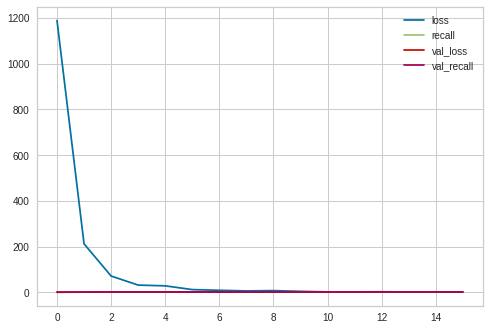

In [149]:
loss_df.plot();

In [150]:
y2_pred = model.predict(X2_test) > 0.5  
#y_pred = model.predict_classes(X_test) for tf 2.5.0

print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

2661/2661 [==============================] - 4s 1ms/step
[[84960    29]
 [  135     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85124
   macro avg       0.50      0.50      0.50     85124
weighted avg       1.00      1.00      1.00     85124



***vi. Plot Precision and Recall Curve***

2661/2661 [==============================] - 3s 1ms/step


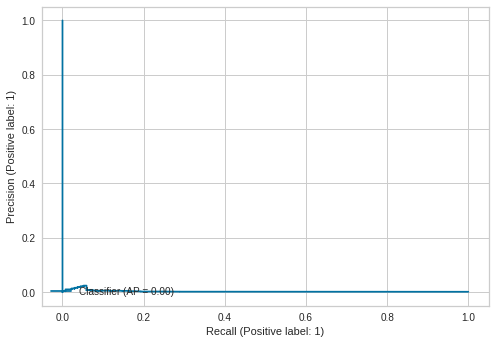

In [151]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y2_pred = model.predict(X2_test)

PrecisionRecallDisplay.from_predictions(y2_test, y2_pred)
plt.show();

2661/2661 [==============================] - 3s 1ms/step


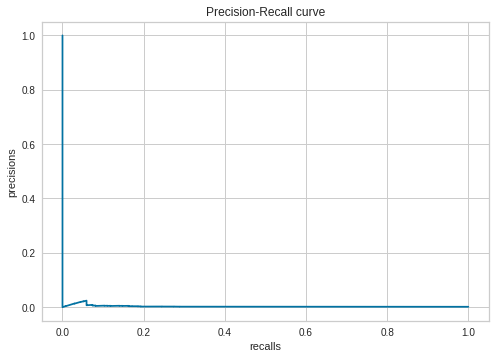

In [152]:
y2_pred = model.predict(X2_test)

precisions, recalls, thresholds = precision_recall_curve(y2_test, y2_pred)

plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [153]:
average_precision_score(y2_test, y2_pred)

0.0029909475220412755

##### Without Class Weights

In [154]:
model.fit(x=X2_train, y=y2_train, validation_split=0.1, batch_size=256, 
          epochs=500, verbose=1, callbacks=[early_stop])

Epoch 1/500
699/699 [==============================] - 3s 3ms/step - loss: 2.6630 - recall: 0.2038 - val_loss: 0.2542 - val_recall: 0.0000e+00
Epoch 2/500
699/699 [==============================] - 2s 3ms/step - loss: 0.8639 - recall: 0.0031 - val_loss: 0.2712 - val_recall: 0.0000e+00
Epoch 3/500
699/699 [==============================] - 2s 3ms/step - loss: 0.5157 - recall: 0.0000e+00 - val_loss: 0.0430 - val_recall: 0.0000e+00
Epoch 4/500
699/699 [==============================] - 2s 3ms/step - loss: 0.3333 - recall: 0.0031 - val_loss: 0.0774 - val_recall: 0.0000e+00
Epoch 5/500
699/699 [==============================] - 2s 3ms/step - loss: 0.2856 - recall: 0.0000e+00 - val_loss: 0.0251 - val_recall: 0.0000e+00
Epoch 6/500
699/699 [==============================] - 2s 3ms/step - loss: 0.2010 - recall: 0.0000e+00 - val_loss: 0.0209 - val_recall: 0.0000e+00
Epoch 7/500
699/699 [==============================] - 2s 3ms/step - loss: 0.1048 - recall: 0.0000e+00 - val_loss: 0.0195 - val_re

***Prediction and Model Evaluating***

In [155]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(20)

loss  recall  val_loss  val_recall
28 0.014   0.000     0.014       0.000
29 0.014   0.000     0.014       0.000
30 0.015   0.000     0.014       0.000
31 0.014   0.000     0.014       0.000
32 0.014   0.000     0.014       0.000
33 0.014   0.000     0.014       0.000
34 0.015   0.000     0.014       0.000
35 0.013   0.000     0.014       0.000
36 0.013   0.000     0.014       0.000
37 0.015   0.000     0.014       0.000
38 0.013   0.000     0.014       0.000
39 0.013   0.000     0.014       0.000
40 0.014   0.000     0.014       0.000
41 0.013   0.000     0.014       0.000
42 0.014   0.000     0.014       0.000
43 0.013   0.000     0.014       0.000
44 0.014   0.000     0.014       0.000
45 0.013   0.000     0.014       0.000
46 0.013   0.000     0.014       0.000
47 0.014   0.003     0.014       0.000

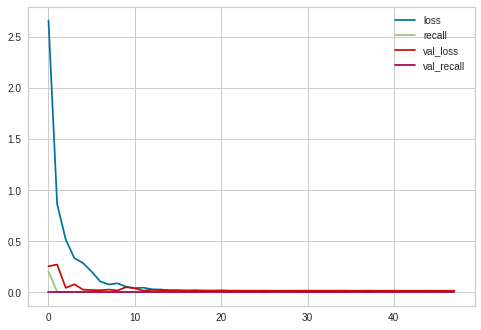

In [156]:
loss_df.plot();

In [157]:
y2_pred = model.predict(X2_test) > 0.5  
#y_pred = model.predict_classes(X_test) for tf 2.5.0

print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

2661/2661 [==============================] - 3s 1ms/step
[[84989     0]
 [  135     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85124
   macro avg       0.50      0.50      0.50     85124
weighted avg       1.00      1.00      1.00     85124



**Plot Precision and Recall Curve**

2661/2661 [==============================] - 3s 1ms/step


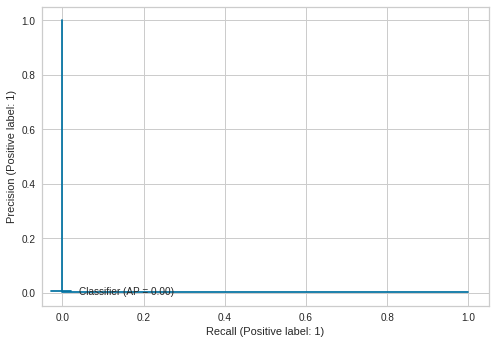

In [158]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y2_pred = model.predict(X2_test)

PrecisionRecallDisplay.from_predictions(y2_test, y2_pred)
plt.show();

2661/2661 [==============================] - 3s 1ms/step


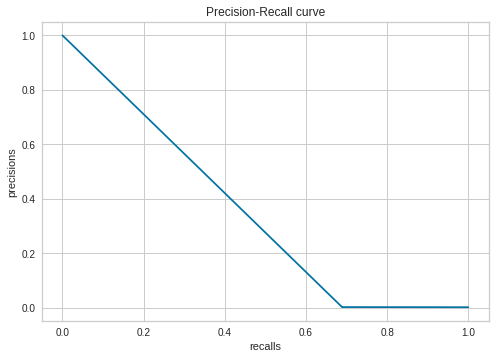

In [159]:
y2_pred = model.predict(X2_test)

precisions, recalls, thresholds = precision_recall_curve(y2_test, y2_pred)

plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [160]:
average_precision_score(y2_test, y2_pred)

0.0019198016739927362

#### With Smote

***ii. Define Model***

In [279]:
model2 = Sequential()
model2.add(Dense(48, activation = "relu", input_dim = X3_train.shape[1]))
model2.add(Dropout(0.5))
model2.add(Dense(24, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(12, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

***iii. Compile Model***

In [280]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

***iv. Fit Model***

In [281]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 48)                1488      
                                                                 
 dropout_30 (Dropout)        (None, 48)                0         
                                                                 
 dense_41 (Dense)            (None, 24)                1176      
                                                                 
 dropout_31 (Dropout)        (None, 24)                0         
                                                                 
 dense_42 (Dense)            (None, 12)                300       
                                                                 
 dropout_32 (Dropout)        (None, 12)                0         
                                                                 
 dense_43 (Dense)            (None, 6)                

In [282]:
model2.fit(x=X3_train, y=y3_train, validation_split=0.2, batch_size=256, 
          epochs=500, verbose=1, callbacks=[early_stop])

Epoch 1/500
1594/1594 [==============================] - 7s 4ms/step - loss: 0.2168 - recall: 0.8635 - val_loss: 0.0415 - val_recall: 0.9880
Epoch 2/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0628 - recall: 0.9915 - val_loss: 0.0187 - val_recall: 0.9999
Epoch 3/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0415 - recall: 0.9970 - val_loss: 0.0126 - val_recall: 0.9997
Epoch 4/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0370 - recall: 0.9978 - val_loss: 0.0114 - val_recall: 0.9998
Epoch 5/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0332 - recall: 0.9983 - val_loss: 0.0095 - val_recall: 1.0000
Epoch 6/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0320 - recall: 0.9983 - val_loss: 0.0094 - val_recall: 0.9990
Epoch 7/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0290 - recall: 0.9986 - val_loss: 0.0077 - val_recall: 1.0000
Epoch 8/500
1

##### <a id="ch1">v. Prediction and Model Evaluating</a>

In [283]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.tail(20)

loss  recall  val_loss  val_recall
100 0.011   0.998     0.003       1.000
101 0.012   0.998     0.003       1.000
102 0.011   0.998     0.003       1.000
103 0.012   0.998     0.003       1.000
104 0.011   0.998     0.002       1.000
105 0.011   0.998     0.002       1.000
106 0.011   0.998     0.003       1.000
107 0.011   0.998     0.002       1.000
108 0.012   0.998     0.003       1.000
109 0.011   0.998     0.003       1.000
110 0.011   0.998     0.003       1.000
111 0.011   0.998     0.003       1.000
112 0.011   0.999     0.003       1.000
113 0.011   0.999     0.002       1.000
114 0.011   0.998     0.002       1.000
115 0.011   0.998     0.003       1.000
116 0.011   0.999     0.002       1.000
117 0.010   0.999     0.003       1.000
118 0.011   0.999     0.002       1.000
119 0.011   0.998     0.003       1.000

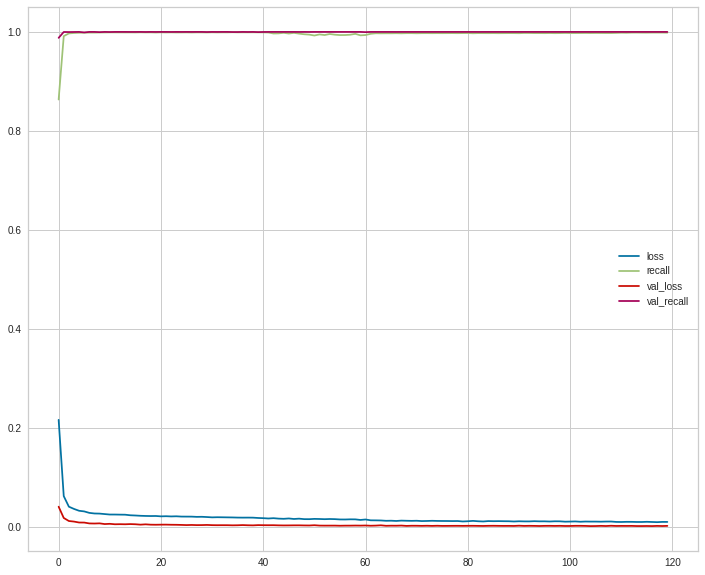

In [284]:
loss_df.plot();

In [285]:
y3_pred = model2.predict(X3_test) > 0.5

print(confusion_matrix(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))

1771/1771 [==============================] - 2s 1ms/step
[[28248    19]
 [    0 28384]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28267
           1       1.00      1.00      1.00     28384

    accuracy                           1.00     56651
   macro avg       1.00      1.00      1.00     56651
weighted avg       1.00      1.00      1.00     56651



***vi. Plot Precision and Recall Curve***

1771/1771 [==============================] - 2s 1ms/step


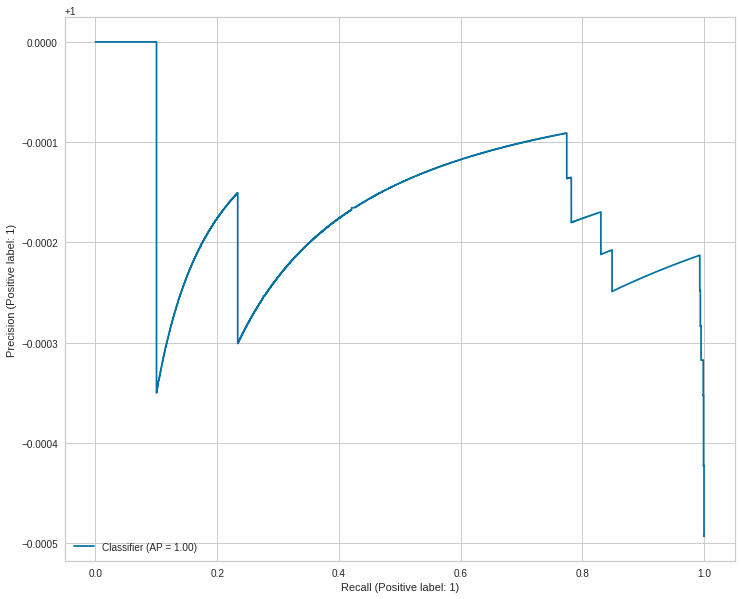

In [286]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y3_pred = model2.predict(X3_test)

PrecisionRecallDisplay.from_predictions(y3_test, y3_pred)
plt.show();

1771/1771 [==============================] - 2s 1ms/step


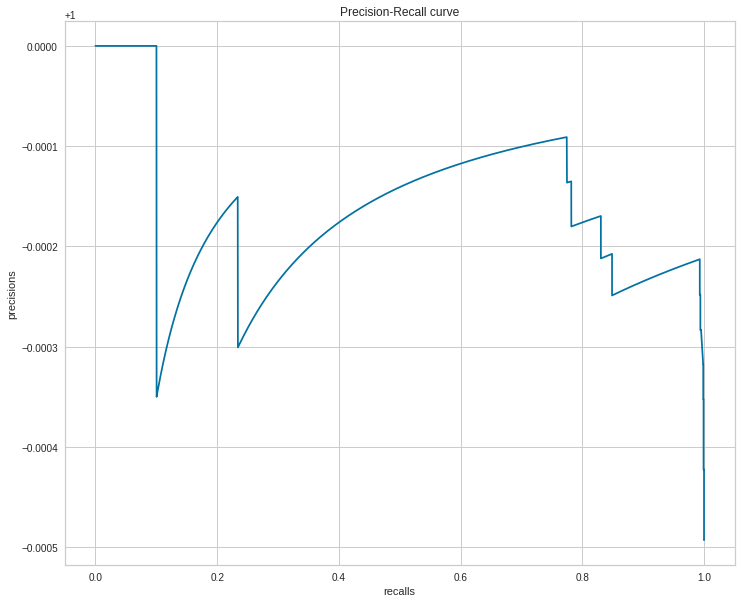

In [287]:
y3_pred = model2.predict(X3_test)

precisions, recalls, thresholds = precision_recall_curve(y3_test, y3_pred)

plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [288]:
average_precision_score(y3_test, y3_pred)

0.9998371449498373

##### Apply Model Evaluation Checks
* [DeepCheks - Model Evaluation Checks](https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html)

In [171]:
gbr = model2
gbr.fit(x=X3_train, y=y3_train, validation_split=0.2, batch_size=256, 
          epochs=500, verbose=1, callbacks=[early_stop])

Epoch 1/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0212 - recall: 0.9960 - val_loss: 0.0080 - val_recall: 1.0000
Epoch 2/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0212 - recall: 0.9962 - val_loss: 0.0088 - val_recall: 1.0000
Epoch 3/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0215 - recall: 0.9961 - val_loss: 0.0117 - val_recall: 1.0000
Epoch 4/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0203 - recall: 0.9964 - val_loss: 0.0104 - val_recall: 1.0000
Epoch 5/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0201 - recall: 0.9964 - val_loss: 0.0083 - val_recall: 1.0000
Epoch 6/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0204 - recall: 0.9965 - val_loss: 0.0100 - val_recall: 1.0000
Epoch 7/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0202 - recall: 0.9965 - val_loss: 0.0094 - val_recall: 1.0000
Epoch 8/500
1

In [172]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X3_train, label=y3_train, cat_features=[])
test_ds = Dataset(X3_test, label=y3_test, cat_features=[])

In [173]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

1771/1771 [==============================] - 2s 1ms/step


1/1 [==============================] - 0s 19ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 1ms/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 500 seconds, but timeout was configured to 120 seconds
Skipping permutation importance calculation: calculation was projected to finish in 500 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 2ms/step


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

In [174]:
from deepchecks.tabular.checks import TrainTestPerformance

gbr = model2
gbr.fit(x=X3_train, y=y3_train, validation_split=0.2, batch_size=256, 
          epochs=500, verbose=1, callbacks=[early_stop])
gbr.fit(X3_train, y3_train)
# Initialize the check and add an optional condition
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, gbr)
result.show()

Epoch 1/500
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0211 - recall: 0.9964 - val_loss: 0.0076 - val_recall: 1.0000
Epoch 2/500
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0203 - recall: 0.9965 - val_loss: 0.0100 - val_recall: 1.0000
Epoch 3/500
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0210 - recall: 0.9964 - val_loss: 0.0089 - val_recall: 1.0000
Epoch 4/500
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0207 - recall: 0.9965 - val_loss: 0.0105 - val_recall: 1.0000
Epoch 5/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0212 - recall: 0.9963 - val_loss: 0.0080 - val_recall: 1.0000
Epoch 6/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0200 - recall: 0.9967 - val_loss: 0.0076 - val_recall: 1.0000
Epoch 7/500
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0197 - recall: 0.9966 - val_loss: 0.0091 - val_recall: 1.0000
Epoch 8/500
1

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Performance

In [175]:
evaluation_suite

Model Evaluation Suite: [
	0: TrainTestPerformance
		Conditions:
			0: Train-Test scores relative degradation is less than 0.1
	1: RocReport(excluded_classes=[])
		Conditions:
			0: AUC score for all the classes is greater than 0.7
	2: ConfusionMatrixReport
	3: TrainTestPredictionDrift(drift_mode=auto)
		Conditions:
			0: categorical drift score < 0.15 and numerical drift score < 0.075
	4: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is greater than 10%
	5: WeakSegmentsPerformance(n_to_show=5)
		Conditions:
			0: The relative performance of weakest segment is greater than 80% of average model performance.
	6: CalibrationScore
	7: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value higher than -0.1
			1: Systematic error ratio lower than 0.01
	8: UnusedFeatures
		Conditions:
			0: Number of high variance unused features is less or equal to 5
	9: BoostingOverfit
		Conditions:
			0: Test score over iterations is less than 5% from the best s

In [176]:
evaluation_suite[0].clean_conditions()
evaluation_suite[0].add_condition_train_test_relative_degradation_less_than(0.3)
evaluation_suite = evaluation_suite.remove(7)

In [177]:
result = evaluation_suite.run(train_ds, test_ds, gbr)
result.passed(fail_if_warning=False)

1771/1771 [==============================] - 2s 1ms/step


1/1 [==============================] - 0s 17ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 1ms/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 484 seconds, but timeout was configured to 120 seconds
Skipping permutation importance calculation: calculation was projected to finish in 484 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 1ms/step


True

#### With Cost-Sensitive Learning

###### Clean, split and normalize the data

In [178]:
import os
import tempfile

In [179]:
df4 = df0.copy()

In [180]:
df4.duplicated().sum()

1081

In [181]:
df4 = df4.drop_duplicates()

In [182]:
df4.duplicated().sum()

0

In [183]:
df4 = df4.reset_index(drop=True)

In [184]:
df4.head()

Time     V1     V2    V3     V4     V5     V6     V7     V8     V9    V10  \
0 0.000 -1.360 -0.073 2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091   
1 0.000  1.192  0.266 0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167   
2 1.000 -1.358 -1.340 1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208   
3 1.000 -0.966 -0.185 1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055   
4 2.000 -1.158  0.878 1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -0.552 -0.618 -0.991 -0.311  1.468 -0.470  0.208  0.026  0.404  0.251   
1  1.613  1.065  0.489 -0.144  0.636  0.464 -0.115 -0.183 -0.146 -0.069   
2  0.625  0.066  0.717 -0.166  2.346 -2.890  1.110 -0.121 -2.262  0.525   
3 -0.226  0.178  0.508 -0.288 -0.631 -1.060 -0.684  1.966 -1.233 -0.208   
4 -0.823  0.538  1.346 -1.120  0.175 -0.451 -0.237 -0.038  0.803  0.409   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061 123.500      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215  69.990      0

In [185]:
eps = 0.001 # 0 => 0.1¢
df4['Log Amount'] = np.log(df4.pop('Amount')+eps)

In [186]:
df4.pop('Time')

0             0.000
1             0.000
2             1.000
3             1.000
4             2.000
            ...    
283721   172786.000
283722   172787.000
283723   172788.000
283724   172788.000
283725   172792.000
Name: Time, Length: 283726, dtype: float64

In [187]:
df4.head()

V1     V2    V3     V4     V5     V6     V7     V8     V9    V10    V11  \
0 -1.360 -0.073 2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091 -0.552   
1  1.192  0.266 0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167  1.613   
2 -1.358 -1.340 1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208  0.625   
3 -0.966 -0.185 1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055 -0.226   
4 -1.158  0.878 1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753 -0.823   

     V12    V13    V14    V15    V16    V17    V18    V19    V20    V21  \
0 -0.618 -0.991 -0.311  1.468 -0.470  0.208  0.026  0.404  0.251 -0.018   
1  1.065  0.489 -0.144  0.636  0.464 -0.115 -0.183 -0.146 -0.069 -0.226   
2  0.066  0.717 -0.166  2.346 -2.890  1.110 -0.121 -2.262  0.525  0.248   
3  0.178  0.508 -0.288 -0.631 -1.060 -0.684  1.966 -1.233 -0.208 -0.108   
4  0.538  1.346 -1.120  0.175 -0.451 -0.237 -0.038  0.803  0.409 -0.009   

     V22    V23    V24    V25    V26    V27    V28  Class  Log Amount  
0  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021      0       5.008  
1 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015      0       0.990  
2  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060      0       5.937  
3  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061      0       4.816  
4  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215      0       4.248

In [188]:
neg, pos = np.bincount(df4['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 283726
    Positive: 473 (0.17% of total)



In [189]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df4, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [190]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (181584,)
Validation labels shape: (45396,)
Test labels shape: (56746,)
Training features shape: (181584, 29)
Validation features shape: (45396, 29)
Test features shape: (56746, 29)


##### Define Baseline Model

In [191]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(48, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(24, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(12, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(6, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

##### Compile Model

In [192]:
EPOCHS = 100
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=15,
    mode='max',
    restore_best_weights=True)

##### Fit Model

In [193]:
model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 48)                1440      
                                                                 
 dropout_6 (Dropout)         (None, 48)                0         
                                                                 
 dense_11 (Dense)            (None, 24)                1176      
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 12)                300       
                                                                 
 dropout_8 (Dropout)         (None, 12)                0         
                                                                 
 dense_13 (Dense)            (None, 6)                

##### Prediction and Model Evaluating

In [194]:
#Testing Model
model.predict(train_features[:10])

1/1 [==============================] - 0s 62ms/step


array([[0.51932317],
       [0.5528841 ],
       [0.542288  ],
       [0.52271765],
       [0.51081103],
       [0.56387424],
       [0.55098003],
       [0.5599351 ],
       [0.52251935],
       [0.3883579 ]], dtype=float32)

In [195]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7237


In [196]:
#Setting the initial bias
initial_bias = np.log([pos/neg])
initial_bias

array([-6.39500038])

In [197]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 62ms/step


array([[0.00240126],
       [0.00289827],
       [0.00223157],
       [0.00205587],
       [0.002121  ],
       [0.00189309],
       [0.00184683],
       [0.00079293],
       [0.00175268],
       [0.00267992]], dtype=float32)

In [198]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0126


In [199]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [200]:
#Comparing the Losses
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Epoch 1/20
710/710 [==============================] - 8s 8ms/step - loss: 0.2832 - tp: 186.0000 - fp: 134245.0000 - tn: 409571.0000 - fn: 750.0000 - accuracy: 0.7522 - precision: 0.0014 - recall: 0.1987 - auc: 0.5039 - prc: 0.0043 - val_loss: 0.0063 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45324.0000 - val_fn: 72.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9166 - val_prc: 0.7815
Epoch 2/20
710/710 [==============================] - 5s 7ms/step - loss: 0.1242 - tp: 4.0000 - fp: 223.0000 - tn: 181049.0000 - fn: 308.0000 - accuracy: 0.9971 - precision: 0.0176 - recall: 0.0128 - auc: 0.6482 - prc: 0.0033 - val_loss: 0.0057 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45324.0000 - val_fn: 72.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9304 - val_prc: 0.7598
Epoch 3/20
710/710 [==============================] - 5s 7ms/step - loss: 0.0875 - tp: 2.0000 - fp: 27.0000 - tn: 18124

In [201]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Epoch 1/20
710/710 [==============================] - 9s 9ms/step - loss: 0.0137 - tp: 42.0000 - fp: 77.0000 - tn: 226519.0000 - fn: 342.0000 - accuracy: 0.9982 - precision: 0.3529 - recall: 0.1094 - auc: 0.6739 - prc: 0.0779 - val_loss: 0.0115 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45324.0000 - val_fn: 72.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_prc: 0.0016
Epoch 2/20
710/710 [==============================] - 5s 8ms/step - loss: 0.0099 - tp: 53.0000 - fp: 17.0000 - tn: 181255.0000 - fn: 259.0000 - accuracy: 0.9985 - precision: 0.7571 - recall: 0.1699 - auc: 0.7106 - prc: 0.2432 - val_loss: 0.0071 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45324.0000 - val_fn: 72.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9235 - val_prc: 0.7073
Epoch 3/20
710/710 [==============================] - 5s 7ms/step - loss: 0.0092 - tp: 92.0000 - fp: 26.0000 - tn: 181246.00

In [202]:
matplotlib.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [203]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

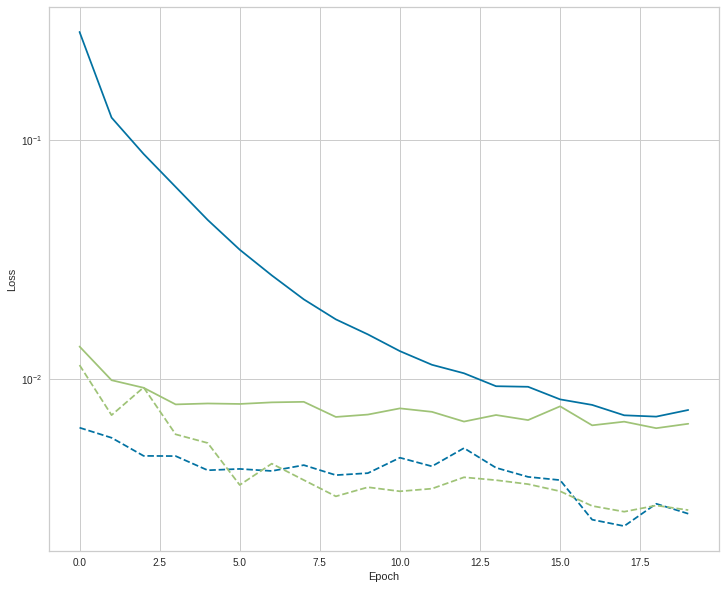

In [204]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

##### Train the model

In [205]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
710/710 [==============================] - 8s 8ms/step - loss: 0.0130 - tp: 68.0000 - fp: 56.0000 - tn: 226540.0000 - fn: 316.0000 - accuracy: 0.9984 - precision: 0.5484 - recall: 0.1771 - auc: 0.6887 - prc: 0.1545 - val_loss: 0.0099 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45324.0000 - val_fn: 72.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7152 - val_prc: 0.3396
Epoch 2/100
710/710 [==============================] - 5s 7ms/step - loss: 0.0102 - tp: 52.0000 - fp: 18.0000 - tn: 181254.0000 - fn: 260.0000 - accuracy: 0.9985 - precision: 0.7429 - recall: 0.1667 - auc: 0.7070 - prc: 0.2270 - val_loss: 0.0059 - val_tp: 12.0000 - val_fp: 1.0000 - val_tn: 45323.0000 - val_fn: 60.0000 - val_accuracy: 0.9987 - val_precision: 0.9231 - val_recall: 0.1667 - val_auc: 0.9235 - val_prc: 0.7463
Epoch 3/100
710/710 [==============================] - 5s 7ms/step - loss: 0.0084 - tp: 101.0000 - fp: 22.0000 - tn: 181250.0000 - fn: 21

##### Check training history

In [206]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

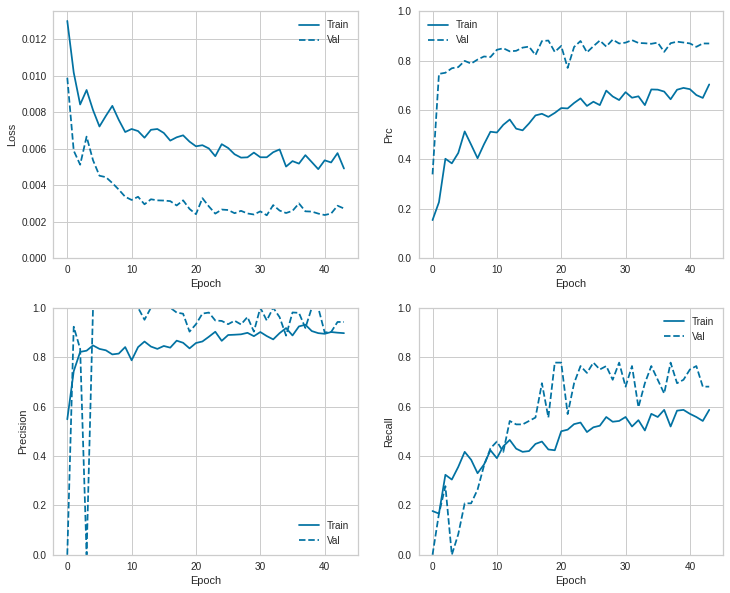

In [207]:
plot_metrics(baseline_history)

##### Evaluate metrics

In [208]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

222/222 [==============================] - 0s 1ms/step


In [209]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.00329311634413898
tp :  61.0
fp :  1.0
tn :  56656.0
fn :  28.0
accuracy :  0.9994889497756958
precision :  0.9838709831237793
recall :  0.6853932738304138
auc :  0.9044462442398071
prc :  0.797425389289856

Legitimate Transactions Detected (True Negatives):  56656
Legitimate Transactions Incorrectly Detected (False Positives):  1
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  61
Total Fraudulent Transactions:  89


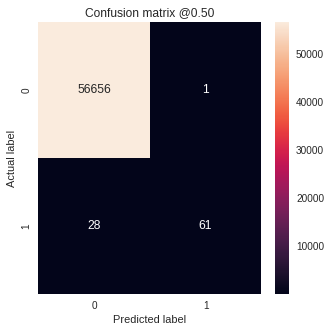

In [210]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

##### Plot the ROC

In [211]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

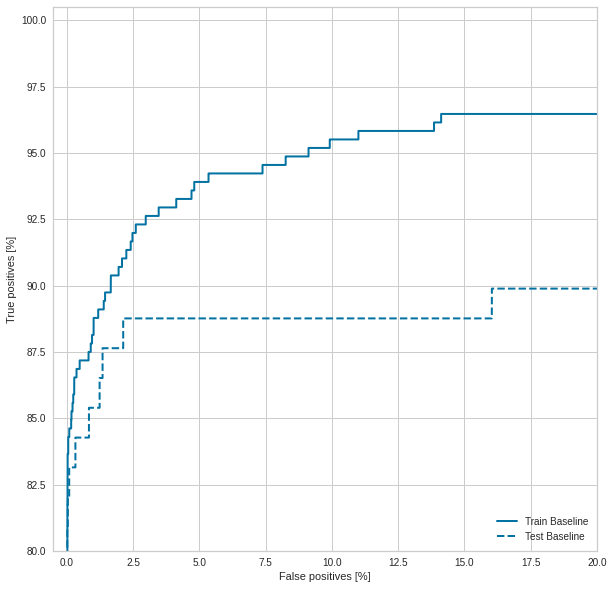

In [212]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

##### Plot the AUPRC

In [213]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

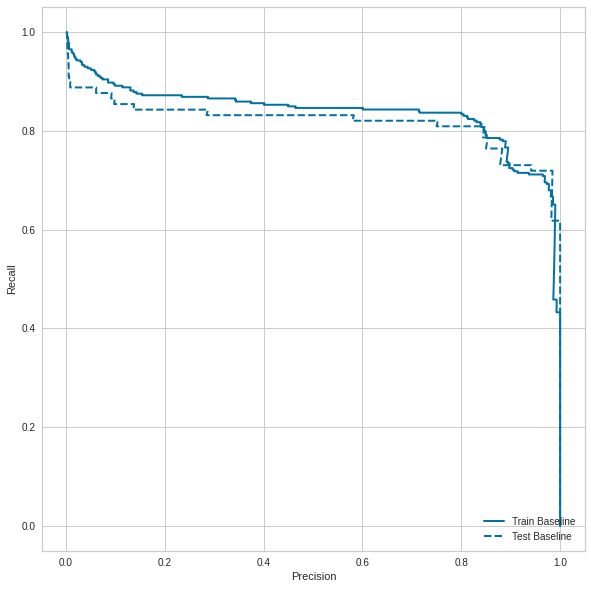

In [214]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

##### Train a model with class weights

#####Calculate class weights

In [215]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 299.92


##### Train a model

In [216]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
710/710 [==============================] - 8s 8ms/step - loss: 2.0548 - tp: 138.0000 - fp: 3072.0000 - tn: 234857.0000 - fn: 263.0000 - accuracy: 0.9860 - precision: 0.0430 - recall: 0.3441 - auc: 0.7164 - prc: 0.0618 - val_loss: 0.0097 - val_tp: 42.0000 - val_fp: 6.0000 - val_tn: 45318.0000 - val_fn: 30.0000 - val_accuracy: 0.9992 - val_precision: 0.8750 - val_recall: 0.5833 - val_auc: 0.9728 - val_prc: 0.7384
Epoch 2/100
710/710 [==============================] - 5s 7ms/step - loss: 1.2381 - tp: 166.0000 - fp: 10766.0000 - tn: 170506.0000 - fn: 146.0000 - accuracy: 0.9399 - precision: 0.0152 - recall: 0.5321 - auc: 0.7259 - prc: 0.0378 - val_loss: 0.0142 - val_tp: 60.0000 - val_fp: 12.0000 - val_tn: 45312.0000 - val_fn: 12.0000 - val_accuracy: 0.9995 - val_precision: 0.8333 - val_recall: 0.8333 - val_auc: 0.9863 - val_prc: 0.7773
Epoch 3/100
710/710 [==============================] - 5s 7ms/step - loss: 1.0093 - tp: 192.0000 - fp: 10648.0000 - tn: 170624.0000 - fn: 120.00

##### Check training history

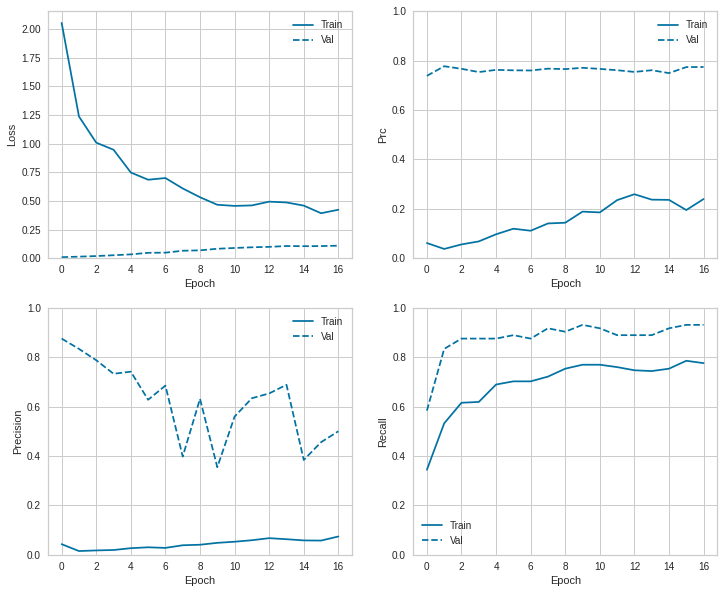

In [217]:
plot_metrics(weighted_history)

##### Evaluate metrics

In [218]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

222/222 [==============================] - 0s 1ms/step


loss :  0.014428602531552315
tp :  72.0
fp :  13.0
tn :  56644.0
fn :  17.0
accuracy :  0.9994713068008423
precision :  0.8470588326454163
recall :  0.8089887499809265
auc :  0.9478602409362793
prc :  0.7343699336051941

Legitimate Transactions Detected (True Negatives):  56644
Legitimate Transactions Incorrectly Detected (False Positives):  13
Fraudulent Transactions Missed (False Negatives):  17
Fraudulent Transactions Detected (True Positives):  72
Total Fraudulent Transactions:  89


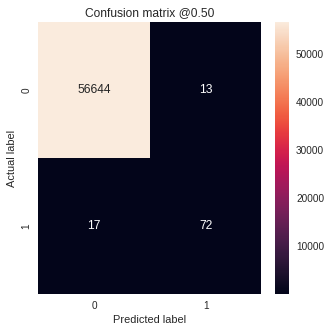

In [219]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

##### Plot the ROC

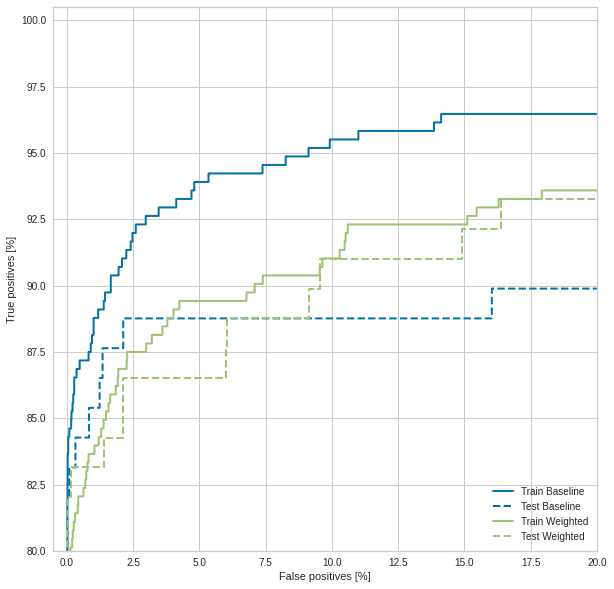

In [220]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

##### Plot the AUPRC

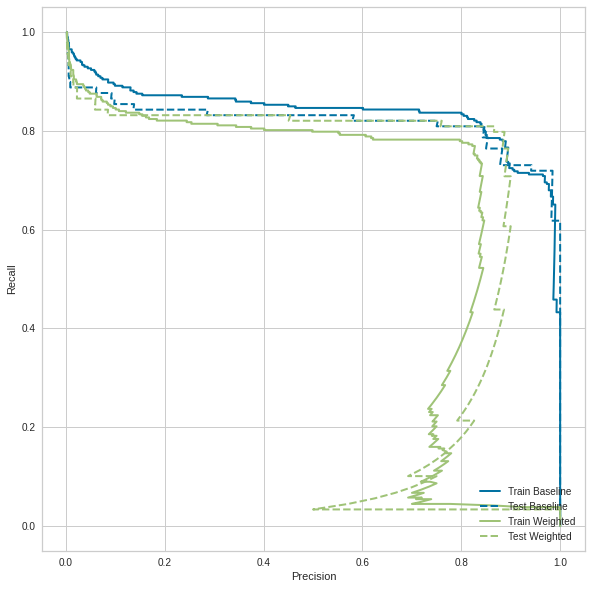

In [221]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

In [289]:
from tensorflow.keras.models import load_model
import pickle

### Save and Export the Best Model


We had the best scores [**ANN with SMOTE**](#ch1)

#### Saving the Best  Model


In [259]:
scaler = RobustScaler().fit(X3[["Time", "Amount"]])

In [260]:
pickle.dump(scaler, open("/content/drive/MyDrive/capstone/3-Fraud_Detection/scaler_fraud", 'wb'))

In [290]:
model2.save("/content/drive/MyDrive/capstone/3-Fraud_Detection/fraud.h5")

####Exporting the Best Model


In [291]:
model_fraud = load_model('/content/drive/MyDrive/capstone/3-Fraud_Detection/fraud.h5')

In [292]:
scaler_fraud = pickle.load(open("/content/drive/MyDrive/capstone/3-Fraud_Detection/scaler_fraud", "rb"))

In [303]:
sample = pd.DataFrame({
        'Time': 154181.000,
        'V1': -0.550, 'V2': 2.219, 'V3': -3.522,'V4': 0.237, 'V5': 1.087,
        'V6': -1.236, 'V7': -0.279,'V8': 0.514, 'V9': -1.850,'V10': -3.444,
        'V11': 2.214, 'V12': -1.690,'V13': 0.498, 'V14': -4.394,'V15': -1.271,
        'V16': -1.177, 'V17': -1.860,'V18': -0.049, 'V19': 0.385,'V20': 0.127,
        'V21': 0.364, 'V22': 0.210,'V23': -0.366, 'V24': 0.016,'V25': 0.349,
        'V26': 0.647, 'V27': 0.172, 'V28': 0.117, 'Amount': 0.760
}, index=[0])
sample

Time     V1    V2     V3    V4    V5     V6     V7    V8     V9  \
0 154181.000 -0.550 2.219 -3.522 0.237 1.087 -1.236 -0.279 0.514 -1.850   

     V10   V11    V12   V13    V14    V15    V16    V17    V18   V19   V20  \
0 -3.444 2.214 -1.690 0.498 -4.394 -1.271 -1.177 -1.860 -0.049 0.385 0.127   

    V21   V22    V23   V24   V25   V26   V27   V28  Amount  
0 0.364 0.210 -0.366 0.016 0.349 0.647 0.172 0.117   0.760

In [299]:
# sample = pd.DataFrame({
#         'Time': 0,
#         'V1': -1.3, 'V2': 0.07, 'V3': -2.5,'V4': 1.4, 'V5': -0.30,
#         'V6': 0.4, 'V7': 0.20,'V8':0.09, 'V9': 0.36,'V10': 0.09,
#         'V11': -0.55, 'V12': -0.62,'V13': -0.99, 'V14': -0.31,'V15': 1.46,
#         'V16': -0.47, 'V17': 0.20,'V18': 0.02, 'V19': 0.40,'V20': 0.25,
#         'V21': -0.02, 'V22': 0.27,'V23': -0.11, 'V24': 0.06,'V25': 0.13,
#         'V26': -0.20, 'V27': 0.13, 'V28': -0.02, 'Amount': 149
# }, index=[0])
# sample

Time     V1    V2     V3    V4     V5    V6    V7    V8    V9   V10    V11  \
0     0 -1.300 0.070 -2.500 1.400 -0.300 0.400 0.200 0.090 0.360 0.090 -0.550   

     V12    V13    V14   V15    V16   V17   V18   V19   V20    V21   V22  \
0 -0.620 -0.990 -0.310 1.460 -0.470 0.200 0.020 0.400 0.250 -0.020 0.270   

     V23   V24   V25    V26   V27    V28  Amount  
0 -0.110 0.060 0.130 -0.200 0.130 -0.020     149

In [304]:
sample[["Time","Amount" ]] = scaler_fraud.transform(sample[["Time", "Amount"]])

In [305]:
sample

Time     V1    V2     V3    V4    V5     V6     V7    V8     V9  \
0 157071.196 -0.550 2.219 -3.522 0.237 1.087 -1.236 -0.279 0.514 -1.850   

     V10   V11    V12   V13    V14    V15    V16    V17    V18   V19   V20  \
0 -3.444 2.214 -1.690 0.498 -4.394 -1.271 -1.177 -1.860 -0.049 0.385 0.127   

    V21   V22    V23   V24   V25   V26   V27   V28  Amount  
0 0.364 0.210 -0.366 0.016 0.349 0.647 0.172 0.117   0.573

In [306]:
(model_fraud.predict(sample) > 0.5).astype("int32")

1/1 [==============================] - 0s 17ms/step


array([[0]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___